# 0. Import the libraries

In [8]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.core.display import HTML, display
from pandas_profiling import ProfileReport
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os
import pickle
import re
import streamlit as st
#from scipy.stats import norm
%matplotlib inline

# 1. Frame the problem and look at the big picture

## 1.1 Define the objective in business terms.

Determine if the income of a person is greater or less than 50k

## 1.2 How will your solution be used?

The solution can be use in the bank industry for loan applications, it could also be use at the dearship for a car financing.

## 1.3 What are the current solutions/workarounds (if any)?

Not applicable

## 1.4 How should you frame this problem (supervised/unsupervised, online/offline, etc.)

Supervised Learning, Batch learning, Model-based learning.

## 1.5 How should performance be measured?

Classification metrics which are: Accuracy score, Confustion matrix, Classification report, Precision, Recall, F1 score, ROC curve, AUC, Precision-Recall curve

## 1.6 Is the performance measure aligned with the business objective?

Not applicable

## 1.7 What would be the minimum performance needed to reach the business objective?

A subjective accuracy of more than 80%.

## 1.8 What are comparable problems? Can you reuse experience or tools?

Not applicable

## 1.9 Is human expertise available?

No

## 1.10 How would you solve the problem manually?

By looking at each person information and determine if they have an income higher than 50K which is a tedious task.

## 1.11 List the assumptions you or others have made so far.

Some of the assumptions would be that education, occupation, race , gender and native country might influence the target. To be verified

## 1.12 Verify assumptions if possible.

To be verified

# 2. Get the data

## 2.1 List the data you need and how much you need.

Will use the data from the train and test datasets.

## 2.2 Find and document where you can get that data.

Done!

## 2.3 Check how much space it will take.

less than 5 Megabytes.

## 2.4 Check legal obligations, and get the authorization if necessary.

Not applicable

## 2.5 Get access authorizations.

Not applicable

## 2.6 Create a workspace (with enough storage space).

No need

## 2.7 Get the data.

In [9]:
train_original = pd.read_csv('datasets/train.csv')

## 2.8 Convert the data to a format you can easily manipulate (without changing the data itself).

Data already in a good format

## 2.9 Ensure sensitive information is deleted or protected (e.g., anonymized).

Not applicable

## 2.10 Check the size and type of data (time series, sample, geographical, etc.).

~ 5 MB of tabular data

## 2.11 Sample a test set, put it aside, and never look at it (no data snooping!).

In [10]:
test_original = pd.read_csv('datasets/test.csv')

In [11]:
full_data = pd.concat([train_original, test_original], axis=0)

In [12]:
# shuffle the data
full_data = full_data.sample(frac=1).reset_index(drop=True)

In [13]:
full_data.shape

(44856, 15)

In [14]:
# split the data into train and test
def data_split(df, test_size):
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=42)
    return train_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [15]:
train_original, test_original = data_split(full_data, 0.2)

In [16]:
train_original.shape

(35884, 15)

In [17]:
test_original.shape

(8972, 15)

In [18]:
train_copy = train_original.copy()
test_copy = test_original.copy()

# 3. Explore the data

## 3.1 Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

Not necessary

## 3.2 Create a Jupyter notebook to keep record of your data exploration.

Done!

## 3.3 Quick overview of the data

In [19]:
train_copy.head()

age workclass  fnlwgt  education  educational-num      marital-status  \
0   38   Private  110402  Assoc-voc               11  Married-civ-spouse   
1   26   Private   58371    HS-grad                9       Never-married   
2   43   Private  173728  Bachelors               13           Separated   
3   36   Private  207789    HS-grad                9            Divorced   
4   31   Private  234537    HS-grad                9       Never-married   

          occupation   relationship   race  gender  capital-gain  \
0  Machine-op-inspct        Husband  White    Male             0   
1       Adm-clerical      Own-child  White    Male             0   
2     Prof-specialty      Unmarried  White  Female             0   
3    Exec-managerial  Not-in-family  White    Male             0   
4  Handlers-cleaners  Not-in-family  White    Male             0   

   capital-loss  hours-per-week native-country  income_>50K  
0             0              40  United-States          0.0  
1             0              40  United-States          0.0  
2             0              40  United-States          0.0  
3             0              52  United-States          0.0  
4             0              60  United-States          0.0

In [20]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              35884 non-null  int64  
 1   workclass        33866 non-null  object 
 2   fnlwgt           35884 non-null  int64  
 3   education        35884 non-null  object 
 4   educational-num  35884 non-null  int64  
 5   marital-status   35884 non-null  object 
 6   occupation       33861 non-null  object 
 7   relationship     35884 non-null  object 
 8   race             35884 non-null  object 
 9   gender           35884 non-null  object 
 10  capital-gain     35884 non-null  int64  
 11  capital-loss     35884 non-null  int64  
 12  hours-per-week   35884 non-null  int64  
 13  native-country   35300 non-null  object 
 14  income_>50K      35167 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 4.1+ MB


In [21]:
train_copy.describe()

age        fnlwgt  educational-num  capital-gain  \
count  35884.000000  3.588400e+04     35884.000000  35884.000000   
mean      38.577249  1.899824e+05        10.081150   1129.073459   
std       13.721873  1.057441e+05         2.569686   7806.554154   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.176060e+05         9.000000      0.000000   
50%       37.000000  1.782820e+05        10.000000      0.000000   
75%       48.000000  2.379462e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week   income_>50K  
count  35884.000000    35884.000000  35167.000000  
mean      88.232499       40.401098      0.240083  
std      404.264410       12.427052      0.427140  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000       45.000000      0.000000  
max     4356.000000       99.000000      1.000000

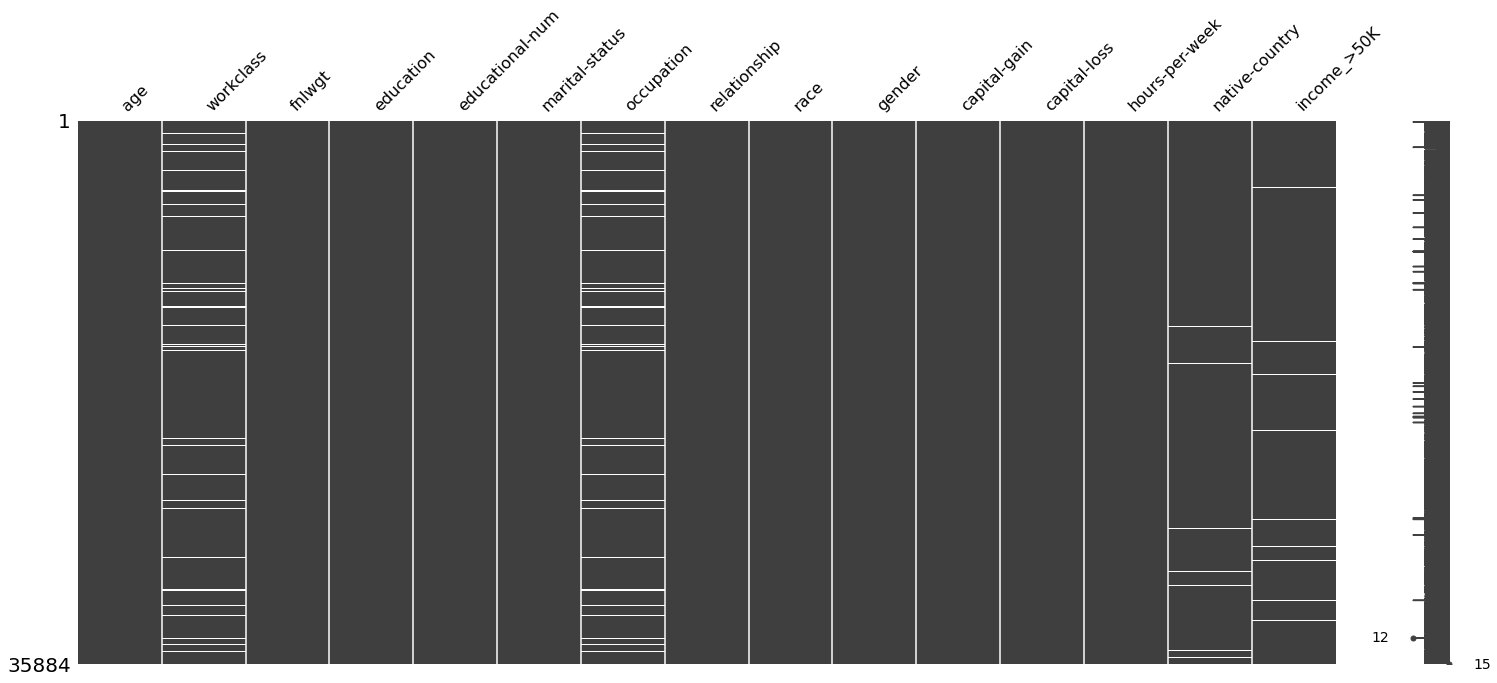

In [22]:
msno.matrix(train_copy)
plt.show()

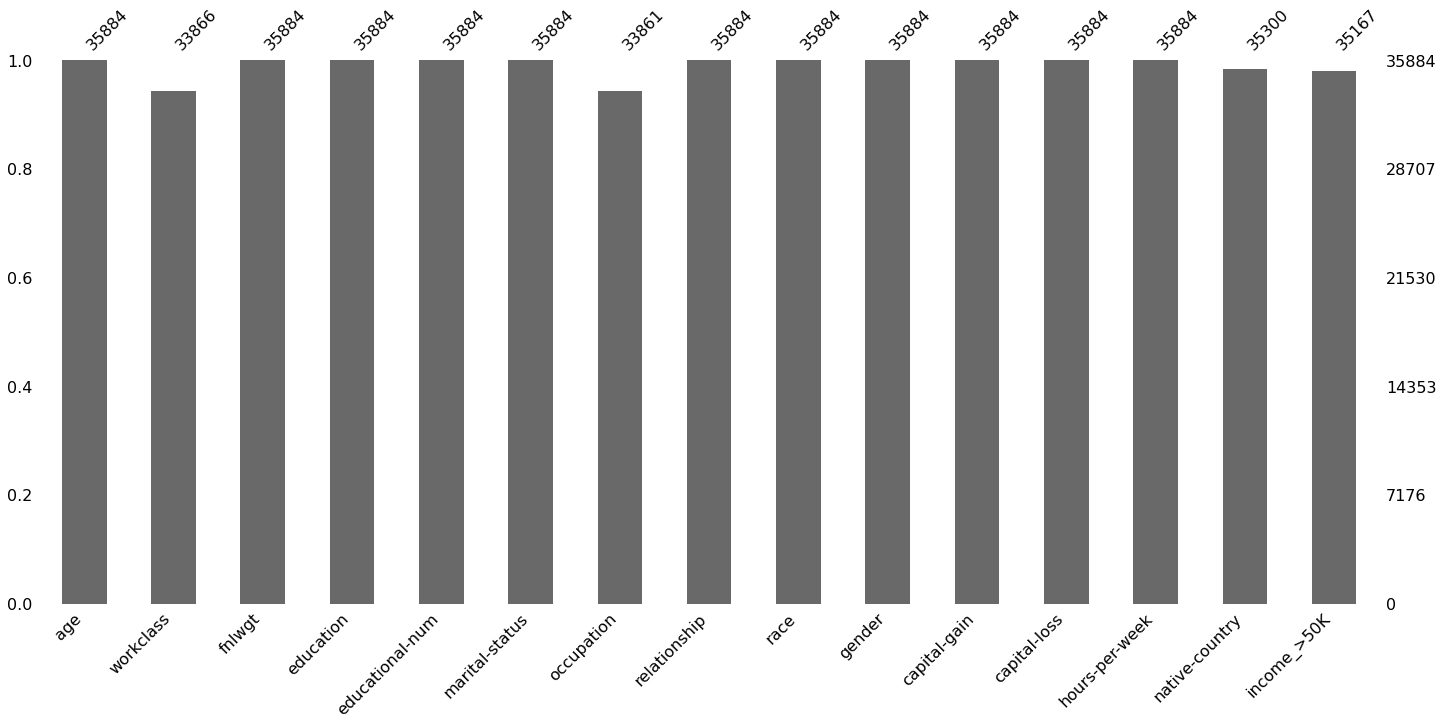

In [23]:
msno.bar(train_copy)
plt.show()

In [24]:
#profile_report = ProfileReport(train_copy, explorative=True, dark_mode=True)

In [25]:
profile_report_file_path = Path('pandas_profile_file/income_class_profile.html')

try:
    profile_report_file_path.resolve(strict=True)
except FileNotFoundError:
    profile_report.to_file("pandas_profile_file/income_class_profile.html")
else:
    pass

## 3.4 Study each attribute and its characteristics:
## - Name
## - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
## - % of missing values
## - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
## - Possibly useful for the task?
## - Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [26]:
#Function that will return the value count and frequency of each observation within a column
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

### 3.4.1 Age

In [27]:
train_copy['age'].head()

0    38
1    26
2    43
3    36
4    31
Name: age, dtype: int64

In [28]:
train_copy['age'].describe()

count    35884.000000
mean        38.577249
std         13.721873
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [29]:
train_copy['age'].dtype

dtype('int64')

In [30]:
train_copy['age'].isnull().sum()

0

In [31]:
age_value_cnt_norm = train_copy['age'].value_counts(normalize=True) * 100

In [32]:
age_value_cnt = train_copy['age'].value_counts()

In [33]:
value_cnt_norm_cal(train_copy, 'age')

Count  Frequency (%)
36   1006       2.803478
33   1005       2.800691
31    994       2.770037
34    990       2.758890
23    982       2.736596
..    ...            ...
88      5       0.013934
85      4       0.011147
87      2       0.005574
89      1       0.002787
86      1       0.002787

[74 rows x 2 columns]

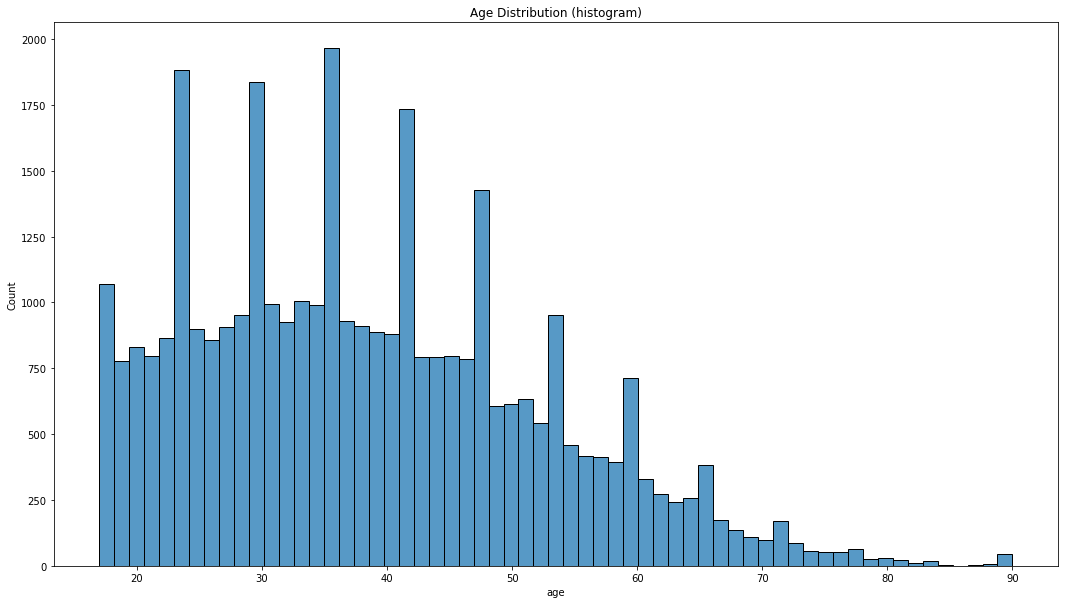

In [34]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['age'])
plt.title('Age Distribution (histogram)')
plt.show()

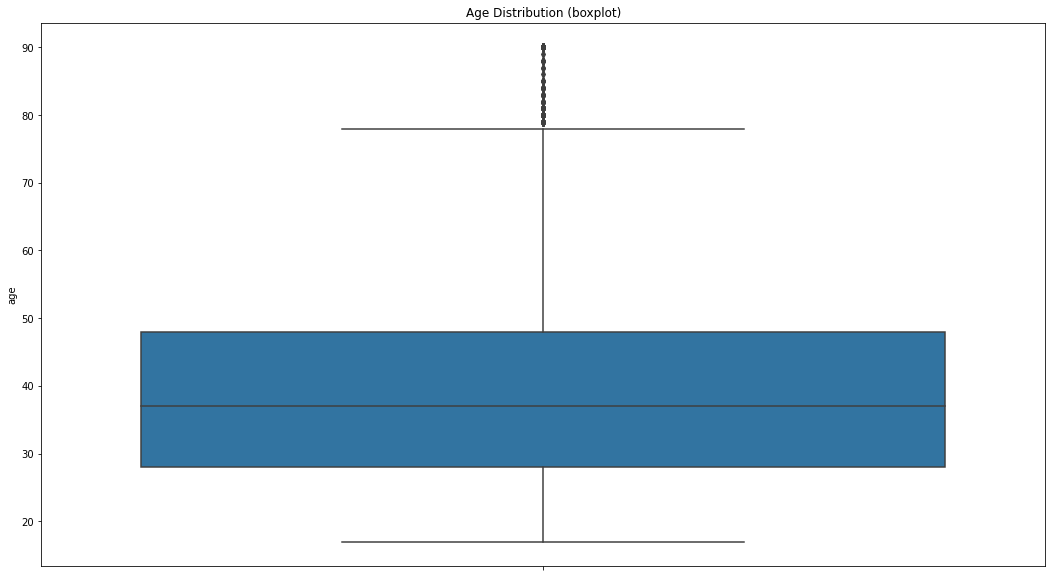

In [35]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(y=train_copy['age'])
plt.title('Age Distribution (boxplot)')
plt.show()

In [36]:
# TODO: Age is might be useful for the model, will keep it for now

### 3.4.2 Workclass

In [37]:
train_copy['workclass'].dtype

dtype('O')

In [38]:
train_copy['workclass'].head()

0    Private
1    Private
2    Private
3    Private
4    Private
Name: workclass, dtype: object

In [39]:
value_cnt_norm_cal(train_copy,'workclass')

Count  Frequency (%)
Private           25014      73.861690
Self-emp-not-inc   2806       8.285596
Local-gov          2335       6.894821
State-gov          1407       4.154609
Self-emp-inc       1237       3.652631
Federal-gov        1044       3.082738
Without-pay          18       0.053151
Never-worked          5       0.014764

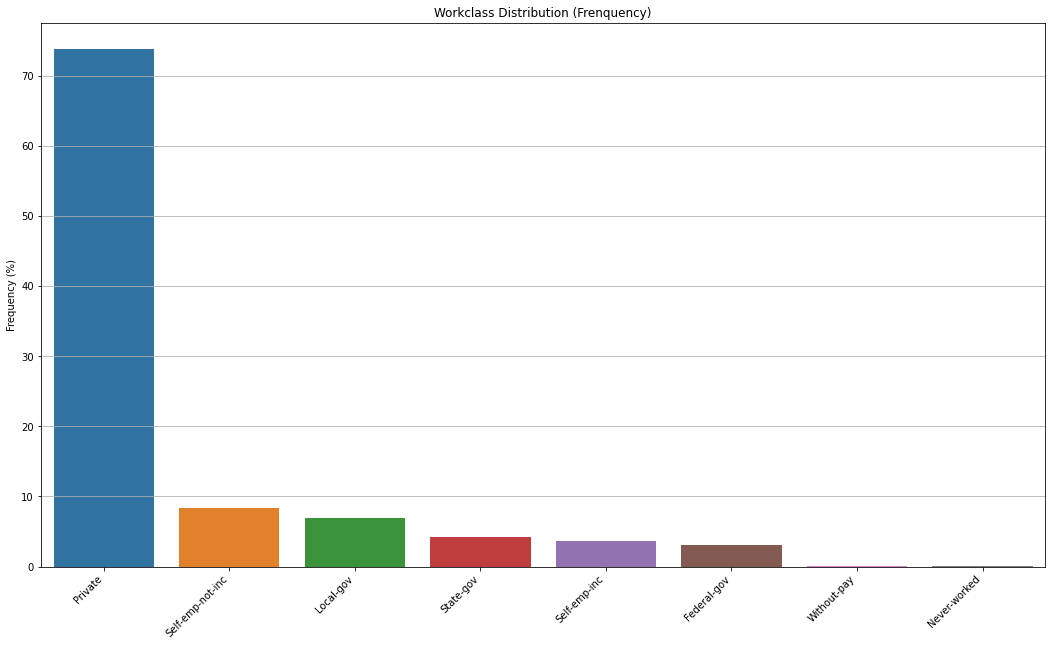

In [40]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'workclass').index, y=value_cnt_norm_cal(train_copy,'workclass')['Frequency (%)'])
plt.title('Workclass Distribution (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

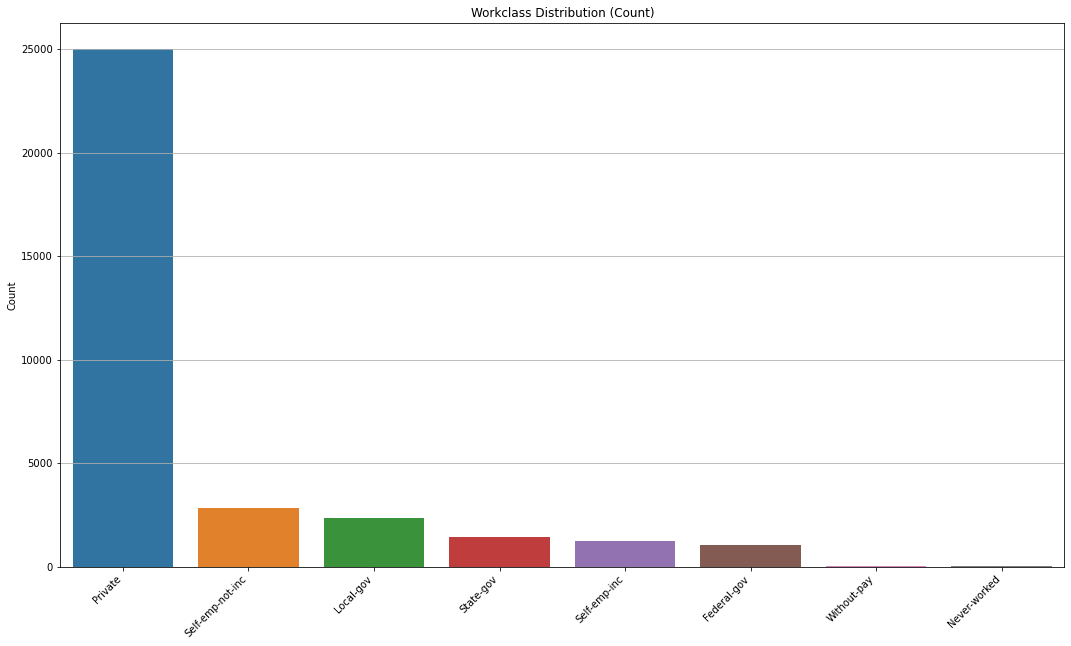

In [41]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'workclass').index, y=value_cnt_norm_cal(train_copy,'workclass')['Count'])
plt.title('Workclass Distribution (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [42]:
train_copy['workclass'].isnull().sum()

2018

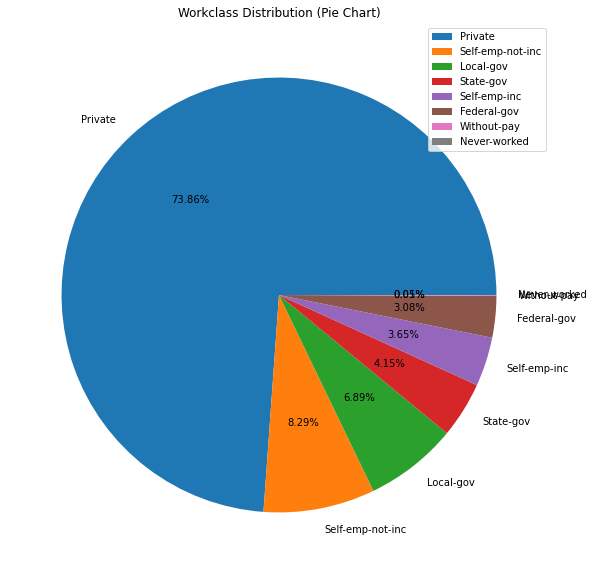

In [43]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['workclass'].value_counts(), labels=train_copy['workclass'].value_counts().index, autopct='%1.2f%%')
plt.title('Workclass Distribution (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [44]:
# TODO: workclass is might be useful for the model, will keep it for now

### 3.4.3 Final weight

Its a weight assigned by the Census Bureau. **The idea is that if two samples have the same(or similar) fnlwgt they have similar characteristics, demographically speaking. **Say sample 7,12 and 33 are having similar fnlwgt values they are more likely to be of the same race, similar educational and social background, etc.. but if you are planning to use it, you should be aware that they are not standardized across different states/country. So someone in one country might share similar fnlwgt with somebody in another country but might have entirely different socio-economic background.

In [45]:
train_copy['fnlwgt'].dtype

dtype('int64')

In [46]:
train_copy['fnlwgt'].head()

0    110402
1     58371
2    173728
3    207789
4    234537
Name: fnlwgt, dtype: int64

In [47]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_copy['fnlwgt'].describe()

count     35884.000
mean     189982.359
std      105744.110
min       13492.000
25%      117606.000
50%      178282.000
75%      237946.250
max     1490400.000
Name: fnlwgt, dtype: float64

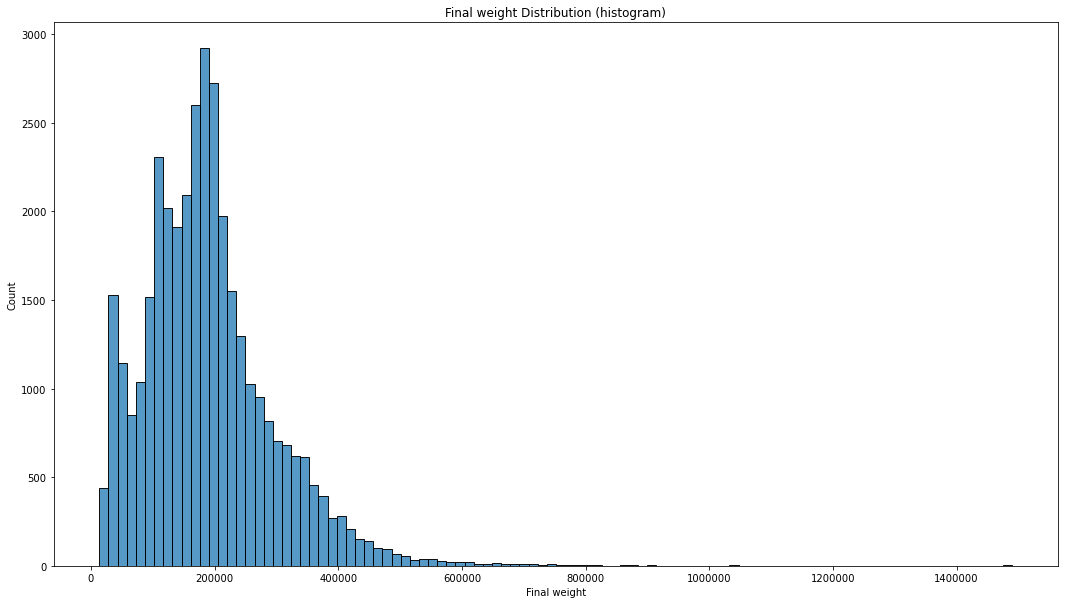

In [48]:
fig, ax = plt.subplots(figsize=(18,10))
ax.ticklabel_format(style='plain')
sns.histplot(train_copy['fnlwgt'],bins=100)
plt.title('Final weight Distribution (histogram)')
plt.xlabel('Final weight')
plt.show()

In [49]:
# TODO: Not sure if this feature is useful, will keep it for now. Will run the feature im and see if this is useful

### 3.4.4. Education

In [50]:
train_copy['education'].dtype

dtype('O')

In [51]:
train_copy['education'].head()

0    Assoc-voc
1      HS-grad
2    Bachelors
3      HS-grad
4      HS-grad
Name: education, dtype: object

In [52]:
train_copy['education'].isnull().sum()

0

In [53]:
value_cnt_norm_cal(train_copy,'education')

Count  Frequency (%)
HS-grad       11592         32.304
Some-college   7985         22.252
Bachelors      5933         16.534
Masters        1947          5.426
Assoc-voc      1476          4.113
11th           1336          3.723
Assoc-acdm     1200          3.344
10th           1042          2.904
7th-8th         702          1.956
Prof-school     606          1.689
9th             556          1.549
12th            470          1.310
Doctorate       438          1.221
5th-6th         359          1.000
1st-4th         182          0.507
Preschool        60          0.167

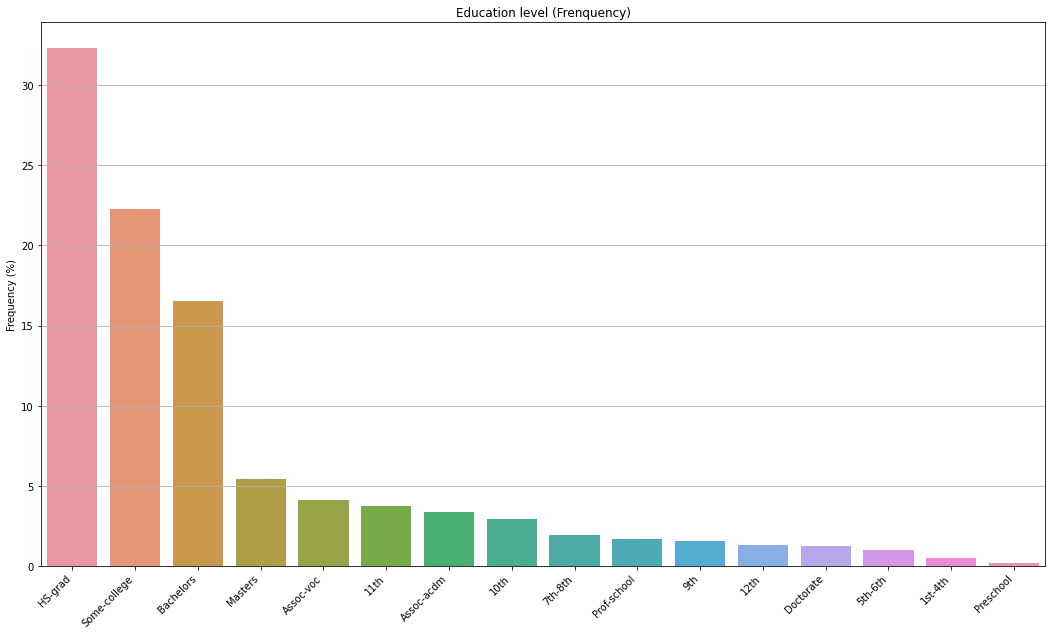

In [54]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'education').index, y=value_cnt_norm_cal(train_copy,'education')['Frequency (%)'])
plt.title('Education level (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

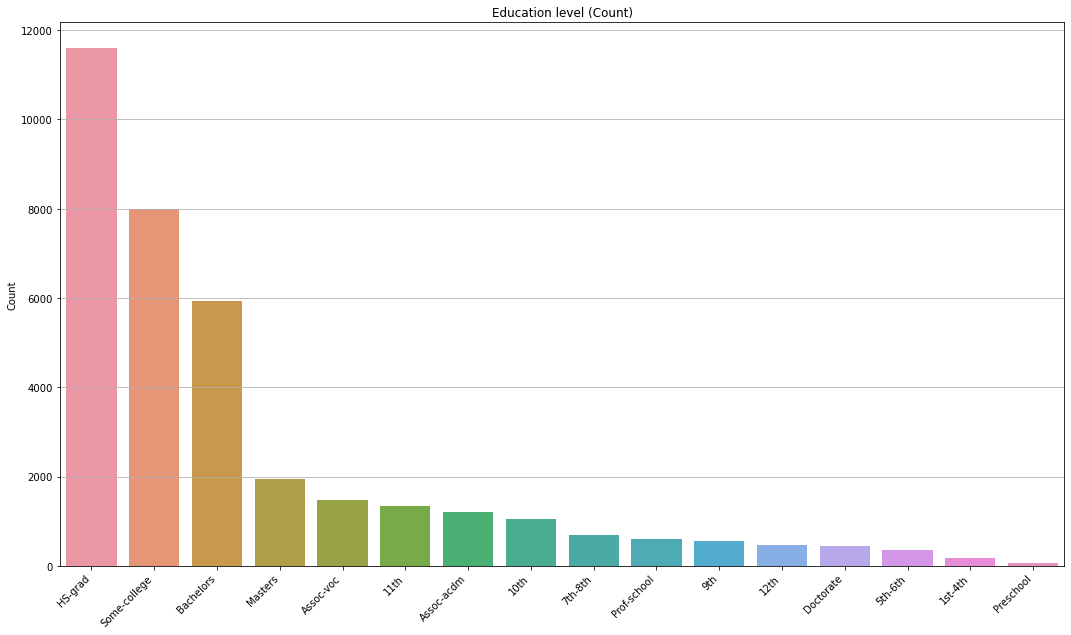

In [55]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'education').index, y=value_cnt_norm_cal(train_copy,'education')['Count'])
plt.title('Education level (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [56]:
# TODO: education level is might be useful for the model, will keep it for now

### 3.4.5 education number

In [57]:
train_copy['educational-num'].dtype

dtype('int64')

In [58]:
train_copy['educational-num'].head()

0    11
1     9
2    13
3     9
4     9
Name: educational-num, dtype: int64

In [59]:
train_copy['educational-num'].value_counts()

9     11592
10     7985
13     5933
14     1947
11     1476
7      1336
12     1200
6      1042
4       702
15      606
5       556
8       470
16      438
3       359
2       182
1        60
Name: educational-num, dtype: int64

In [60]:
train_copy[['education','educational-num']].nunique()

education          16
educational-num    16
dtype: int64

In [61]:
train_copy[['education','educational-num']].value_counts()

education     educational-num
HS-grad       9                  11592
Some-college  10                  7985
Bachelors     13                  5933
Masters       14                  1947
Assoc-voc     11                  1476
11th          7                   1336
Assoc-acdm    12                  1200
10th          6                   1042
7th-8th       4                    702
Prof-school   15                   606
9th           5                    556
12th          8                    470
Doctorate     16                   438
5th-6th       3                    359
1st-4th       2                    182
Preschool     1                     60
dtype: int64

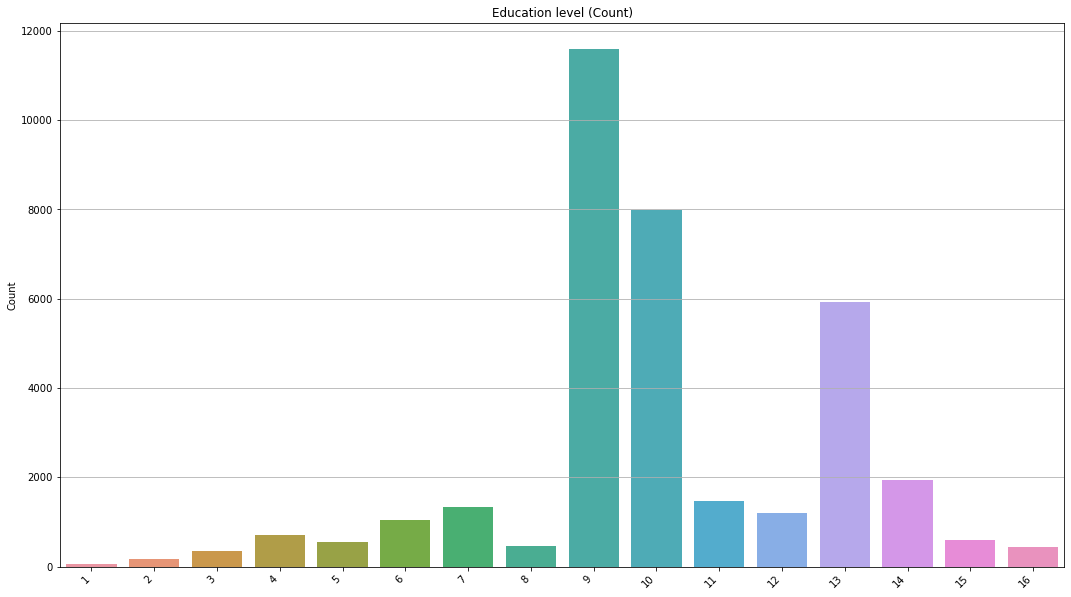

In [62]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'educational-num').index, y=value_cnt_norm_cal(train_copy,'educational-num')['Count'])
plt.title('Education level (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [63]:
# TODO: since education-num is essentially an encoded version of education, will need to drop this feature and keep education for now.

### 3.4.6 Marital Status

In [64]:
train_copy['marital-status'].dtype

dtype('O')

In [65]:
train_copy['marital-status'].head()

0    Married-civ-spouse
1         Never-married
2             Separated
3              Divorced
4         Never-married
Name: marital-status, dtype: object

In [66]:
train_copy['marital-status'].isnull().sum()

0

In [67]:
value_cnt_norm_cal(train_copy,'marital-status')

Count  Frequency (%)
Married-civ-spouse     16405         45.717
Never-married          11846         33.012
Divorced                4946         13.783
Separated               1110          3.093
Widowed                 1086          3.026
Married-spouse-absent    467          1.301
Married-AF-spouse         24          0.067

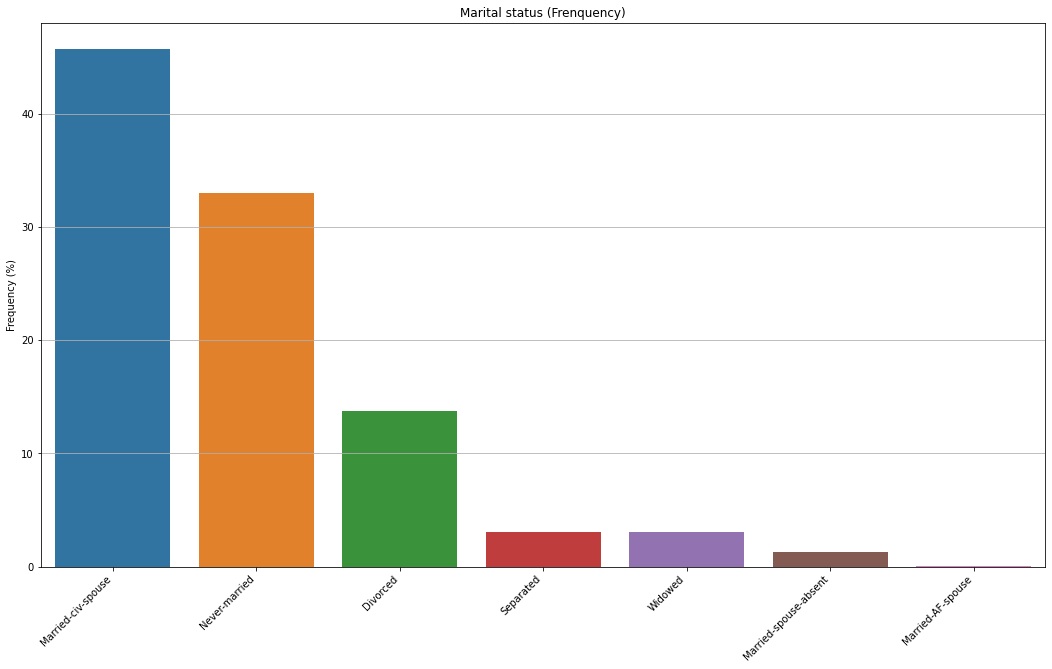

In [68]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'marital-status').index, y=value_cnt_norm_cal(train_copy,'marital-status')['Frequency (%)'])
plt.title('Marital status (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

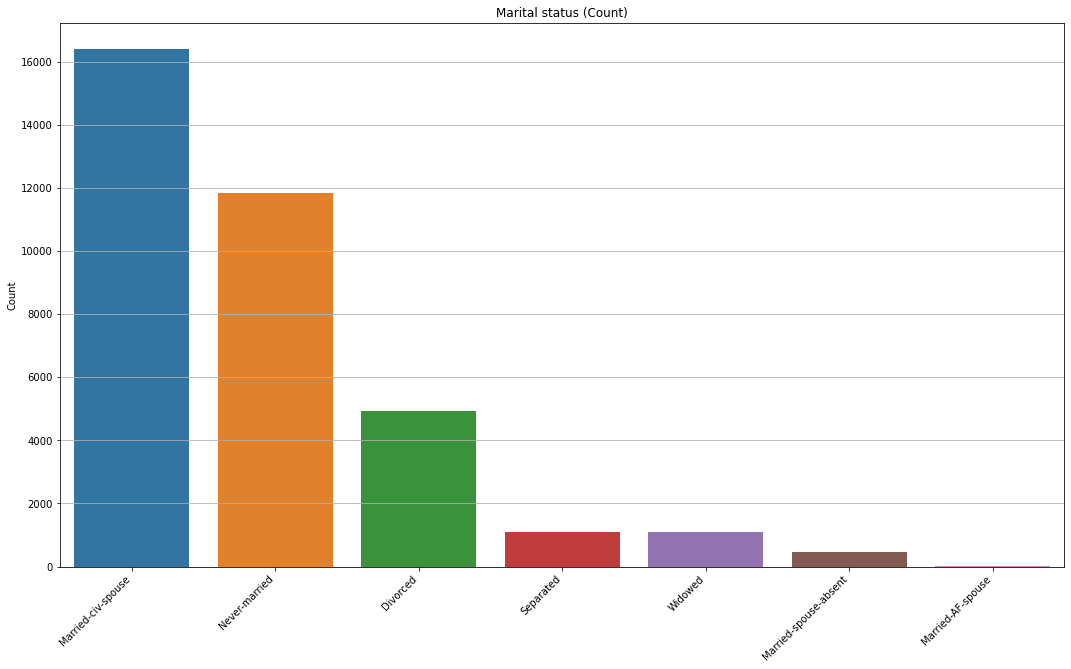

In [69]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'marital-status').index, y=value_cnt_norm_cal(train_copy,'marital-status')['Count'])
plt.title('Marital status (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

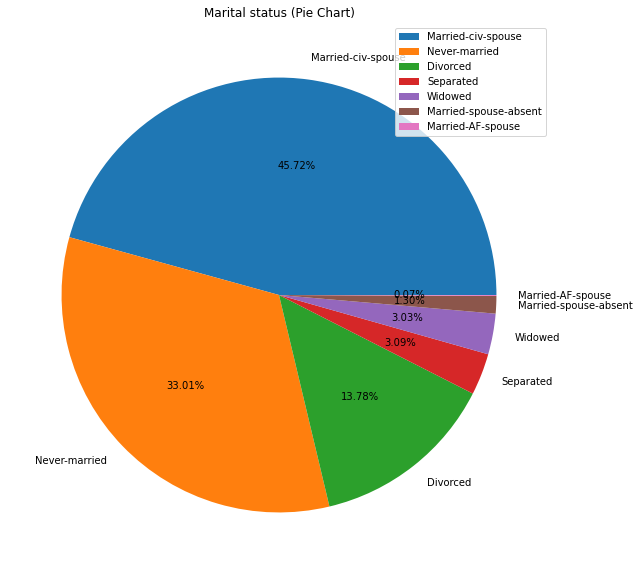

In [70]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['marital-status'].value_counts(), labels=train_copy['marital-status'].value_counts().index, autopct='%1.2f%%')
plt.title('Marital status (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

### 3.4.7 Occupation

In [71]:
train_copy['occupation'].dtype

dtype('O')

In [72]:
train_copy['occupation'].head()

0    Machine-op-inspct
1         Adm-clerical
2       Prof-specialty
3      Exec-managerial
4    Handlers-cleaners
Name: occupation, dtype: object

In [73]:
train_copy['occupation'].isnull().sum()

2023

In [74]:
train_copy['occupation'].value_counts()

Craft-repair         4550
Prof-specialty       4517
Exec-managerial      4425
Sales                4090
Adm-clerical         4082
Other-service        3666
Machine-op-inspct    2198
Transport-moving     1714
Handlers-cleaners    1537
Tech-support         1098
Farming-fishing      1058
Protective-serv       734
Priv-house-serv       180
Armed-Forces           12
Name: occupation, dtype: int64

In [75]:
train_copy['occupation'].nunique()

14

In [76]:
value_cnt_norm_cal(train_copy,'occupation')

Count  Frequency (%)
Craft-repair        4550         13.437
Prof-specialty      4517         13.340
Exec-managerial     4425         13.068
Sales               4090         12.079
Adm-clerical        4082         12.055
Other-service       3666         10.827
Machine-op-inspct   2198          6.491
Transport-moving    1714          5.062
Handlers-cleaners   1537          4.539
Tech-support        1098          3.243
Farming-fishing     1058          3.125
Protective-serv      734          2.168
Priv-house-serv      180          0.532
Armed-Forces          12          0.035

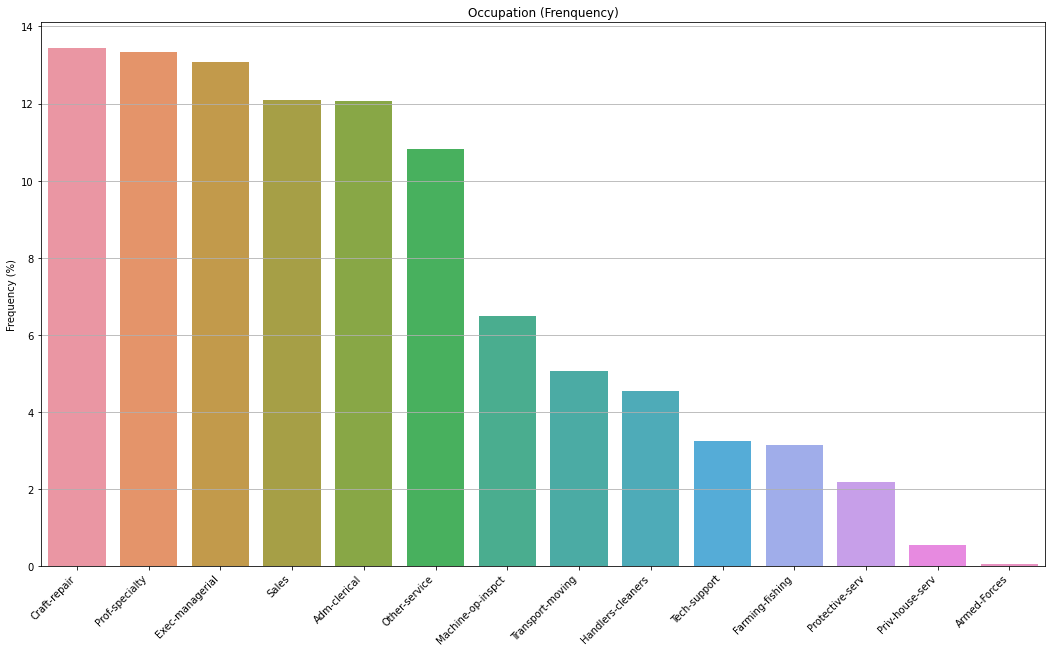

In [77]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'occupation').index, y=value_cnt_norm_cal(train_copy,'occupation')['Frequency (%)'])
plt.title('Occupation (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

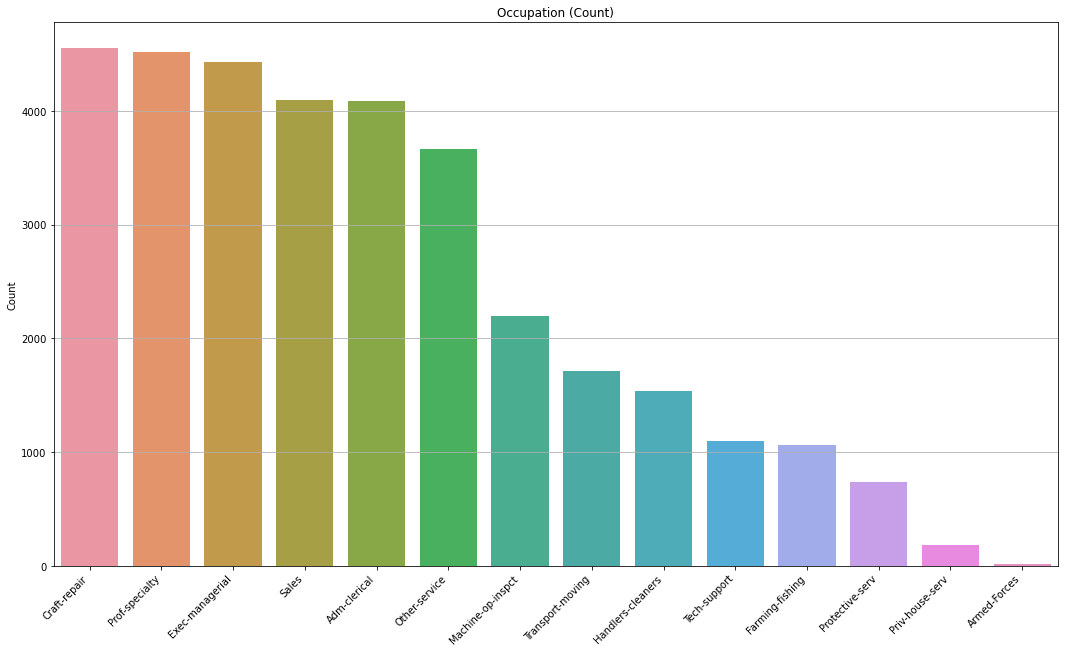

In [78]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'occupation').index, y=value_cnt_norm_cal(train_copy,'occupation')['Count'])
plt.title('Occupation (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [79]:
## TODO: occupation is highly correlated with workclass, has almost the same missing value like workclass and gives less info than workclass. we might need to drop this feature.

### 3.4.8 relationship

In [80]:
train_copy['relationship'].dtype

dtype('O')

In [81]:
train_copy['relationship'].head()

0          Husband
1        Own-child
2        Unmarried
3    Not-in-family
4    Not-in-family
Name: relationship, dtype: object

In [82]:
train_copy['relationship'].value_counts()

Husband           14459
Not-in-family      9260
Own-child          5572
Unmarried          3794
Wife               1700
Other-relative     1099
Name: relationship, dtype: int64

In [83]:
train_copy['relationship'].isnull().sum()

0

In [84]:
value_cnt_norm_cal(train_copy,'relationship')

Count  Frequency (%)
Husband         14459         40.294
Not-in-family    9260         25.805
Own-child        5572         15.528
Unmarried        3794         10.573
Wife             1700          4.737
Other-relative   1099          3.063

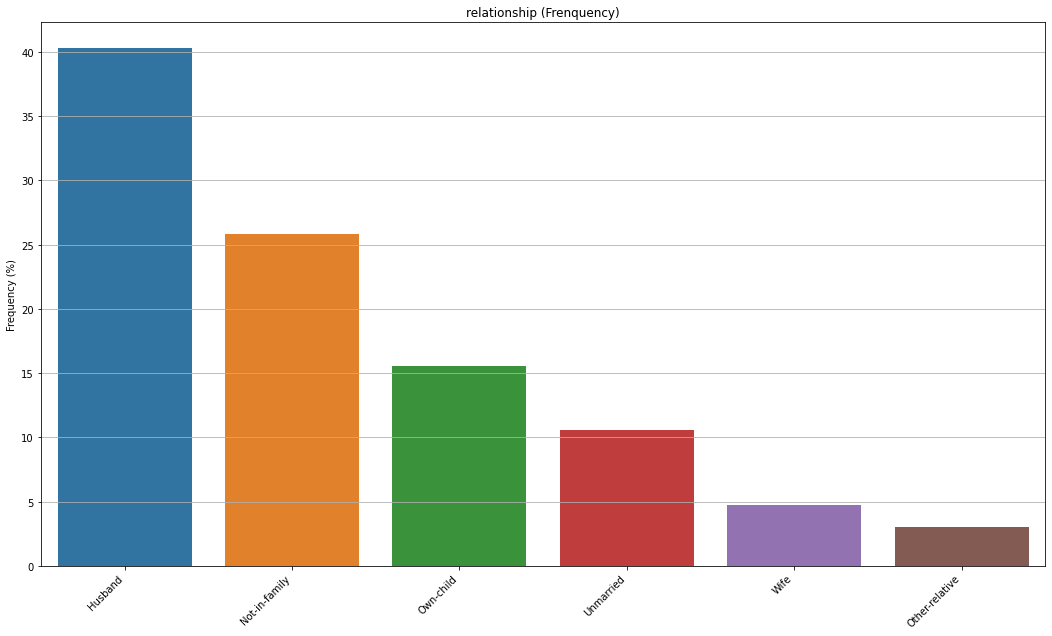

In [85]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'relationship').index, y=value_cnt_norm_cal(train_copy,'relationship')['Frequency (%)'])
plt.title('relationship (Frenquency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

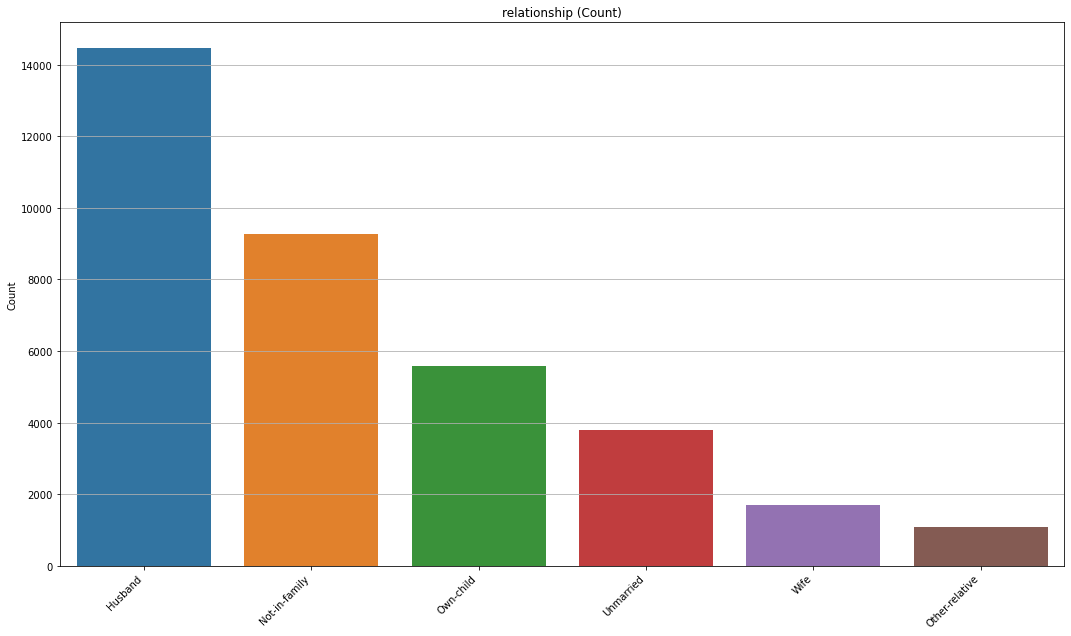

In [86]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'relationship').index, y=value_cnt_norm_cal(train_copy,'relationship')['Count'])
plt.title('relationship (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

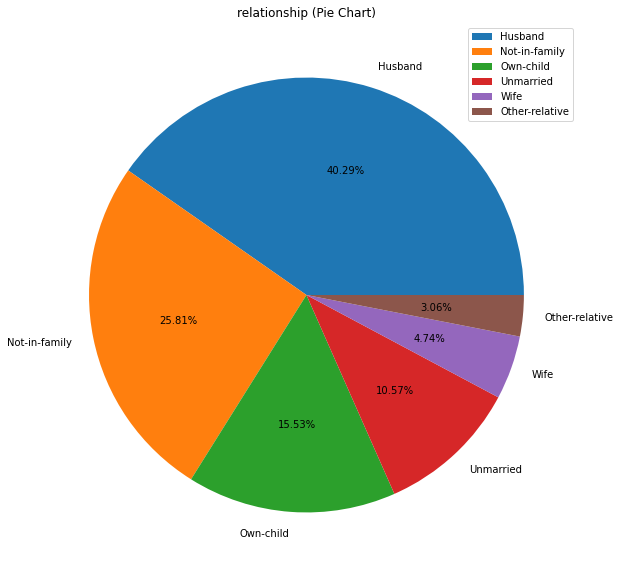

In [87]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['relationship'].value_counts(), labels=train_copy['relationship'].value_counts().index, autopct='%1.2f%%')
plt.title('relationship (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [88]:
# TODO: relationship is highly correlated with Marital status. we might need to drop this feature.

### 3.4.9 Race

In [89]:
train_copy['race'].dtype

dtype('O')

In [90]:
train_copy['race'].isnull().sum()

0

In [91]:
train_copy['race'].head()

0    White
1    White
2    White
3    White
4    White
Name: race, dtype: object

In [92]:
value_cnt_norm_cal(train_copy,'race')

Count  Frequency (%)
White               30652         85.420
Black                3482          9.703
Asian-Pac-Islander   1104          3.077
Amer-Indian-Eskimo    353          0.984
Other                 293          0.817

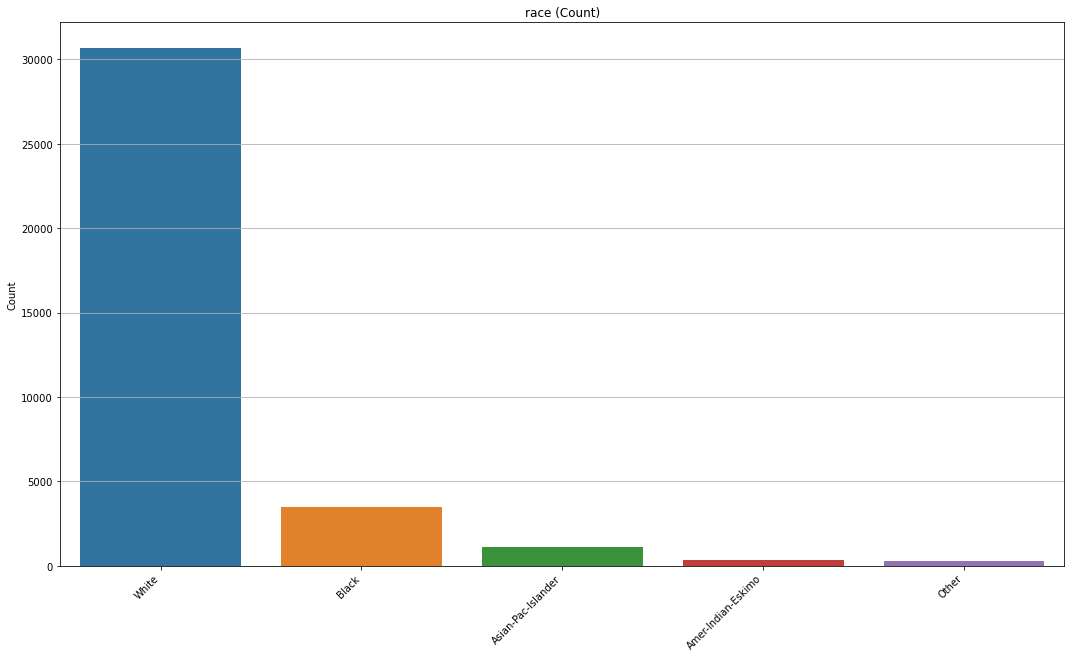

In [93]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'race').index, y=value_cnt_norm_cal(train_copy,'race')['Count'])
plt.title('race (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

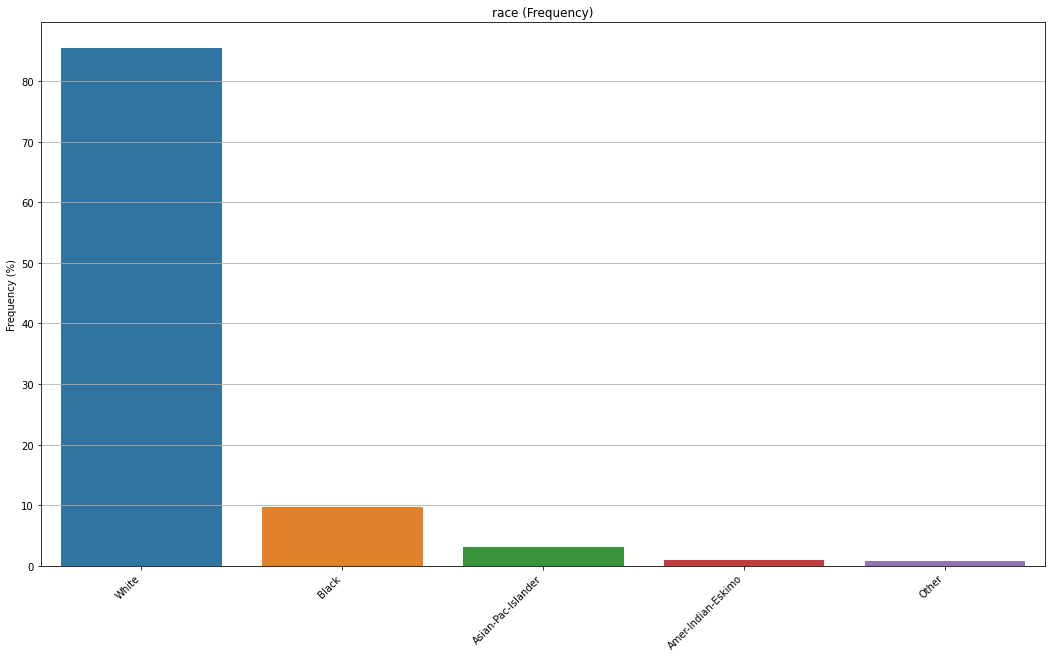

In [94]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'race').index, y=value_cnt_norm_cal(train_copy,'race')['Frequency (%)'])
plt.title('race (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

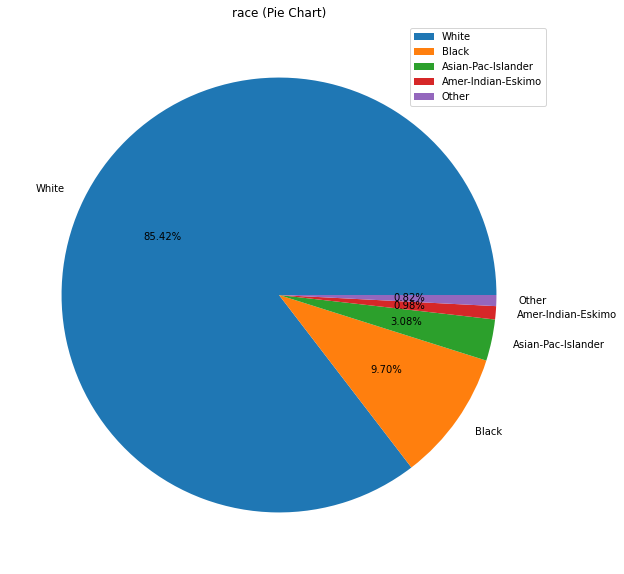

In [95]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['race'].value_counts(), labels=train_copy['race'].value_counts().index, autopct='%1.2f%%')
plt.title('race (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [96]:
# TODO: Race might influence on the salary. will keep it

### 3.4.10 Gender

In [97]:
train_copy['gender'].dtype

dtype('O')

In [98]:
train_copy['race'].isnull().sum()

0

In [99]:
value_cnt_norm_cal(train_copy,'gender')

Count  Frequency (%)
Male    23937         66.707
Female  11947         33.293

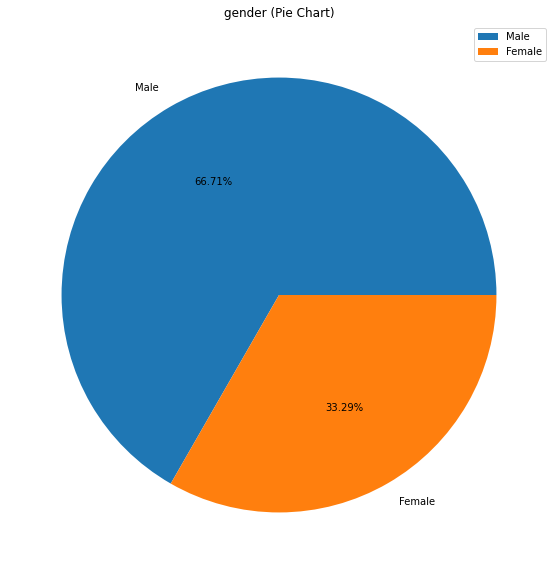

In [100]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['gender'].value_counts(), labels=train_copy['gender'].value_counts().index, autopct='%1.2f%%')
plt.title('gender (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

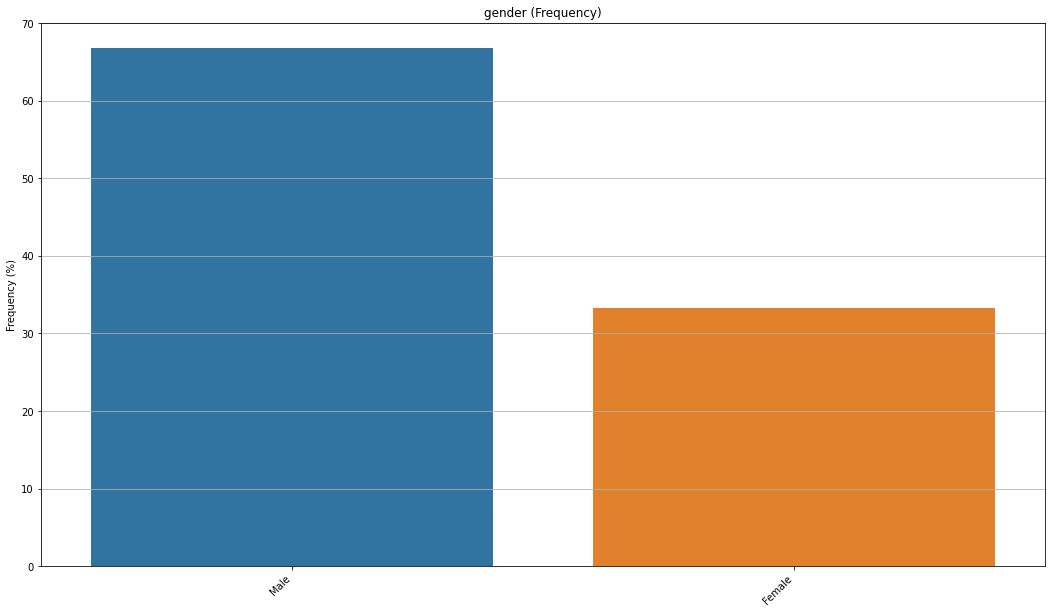

In [101]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'gender').index, y=value_cnt_norm_cal(train_copy,'gender')['Frequency (%)'])
plt.title('gender (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

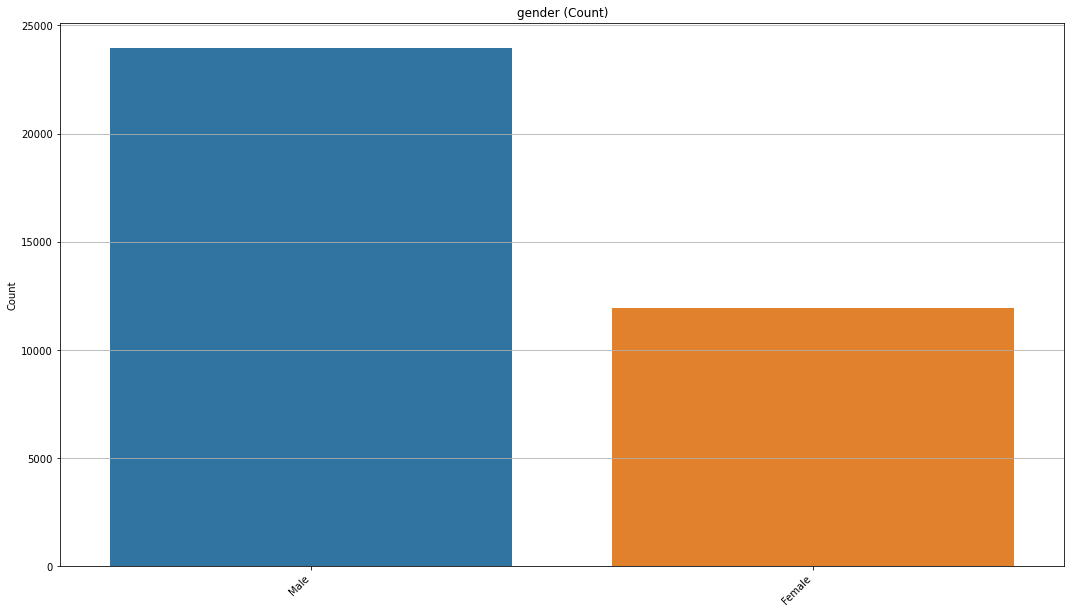

In [102]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'gender').index, y=value_cnt_norm_cal(train_copy,'gender')['Count'])
plt.title('gender (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [103]:
# TODO: Gender might influence on the salary. will keep it

### 3.4.11 capital gain

In [104]:
train_copy['capital-gain'].dtype

dtype('int64')

In [105]:
train_copy['capital-gain'].describe()

count   35884.000
mean     1129.073
std      7806.554
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital-gain, dtype: float64

In [106]:
train_copy['capital-gain'].isnull().sum()

0

In [107]:
train_copy['capital-gain'].value_counts()

0        32968
15024      378
7688       301
7298       265
99999      199
         ...  
1111         1
6612         1
1731         1
2993         1
22040        1
Name: capital-gain, Length: 121, dtype: int64

In [108]:
train_copy['capital-gain'].shape

(35884,)

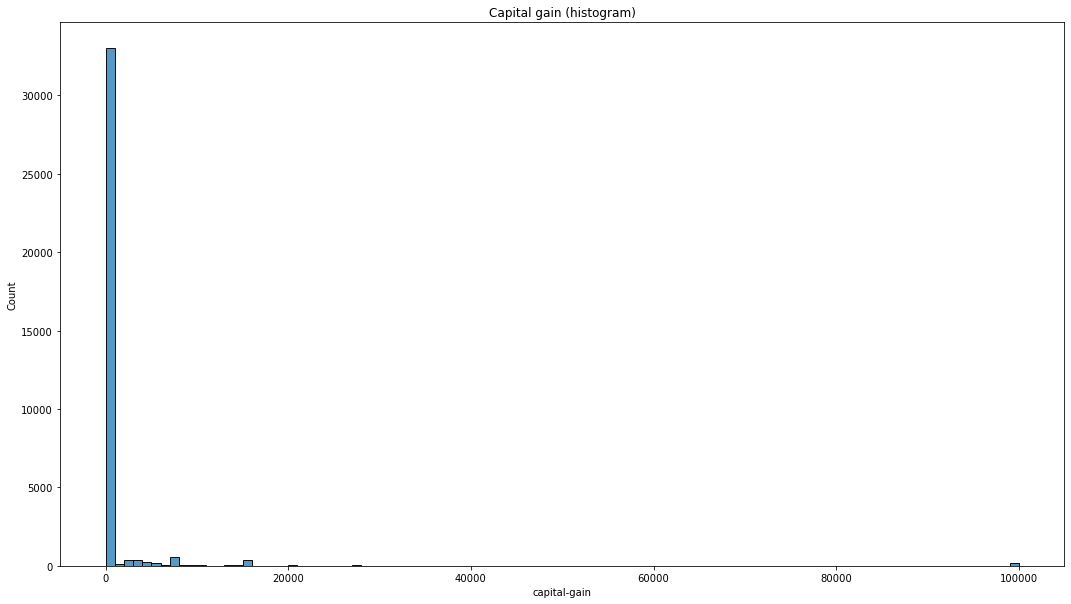

In [109]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['capital-gain'],bins=100)
plt.title('Capital gain (histogram)')
plt.show()

In [110]:
# TODO: Capital gain is very skewed and contains a lot of zeros. we might need to drop this feature.

### 3.4.12 capital loss

In [111]:
train_copy['capital-loss'].dtype

dtype('int64')

In [112]:
train_copy['capital-loss'].describe()

count   35884.000
mean       88.232
std       404.264
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital-loss, dtype: float64

In [113]:
train_copy['capital-loss'].isnull().sum()

0

In [114]:
train_copy['capital-loss'].value_counts()

0       34193
1902      231
1977      191
1887      159
2415       50
        ...  
1411        1
323         1
2201        1
2163        1
3683        1
Name: capital-loss, Length: 95, dtype: int64

In [115]:
train_copy['capital-loss'].shape

(35884,)

In [116]:
value_cnt_norm_cal(train_copy,'capital-loss')

Count  Frequency (%)
0     34193         95.288
1902    231          0.644
1977    191          0.532
1887    159          0.443
2415     50          0.139
...     ...            ...
1411      1          0.003
323       1          0.003
2201      1          0.003
2163      1          0.003
3683      1          0.003

[95 rows x 2 columns]

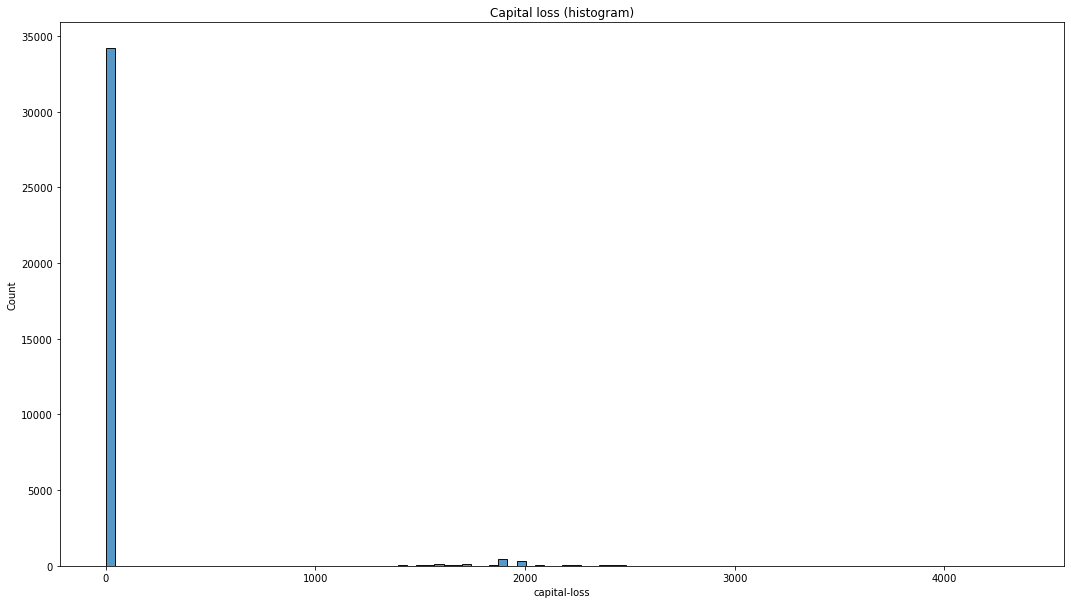

In [117]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['capital-loss'],bins=100)
plt.title('Capital loss (histogram)')
plt.show()

In [118]:
# TODO: Capital loss is very skewed and contains a lot of zeros. we might need to drop this feature.

### 3.4.13 Hours per week

In [119]:
train_copy['hours-per-week'].dtype

dtype('int64')

In [120]:
train_copy['hours-per-week'].describe()

count   35884.000
mean       40.401
std        12.427
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours-per-week, dtype: float64

In [121]:
value_cnt_norm_cal(train_copy,'hours-per-week')

Count  Frequency (%)
40  16723         46.603
50   3090          8.611
45   1995          5.560
60   1590          4.431
35   1489          4.149
..    ...            ...
88      1          0.003
94      1          0.003
87      1          0.003
79      1          0.003
86      1          0.003

[95 rows x 2 columns]

In [122]:
train_copy['hours-per-week'].isnull().sum()

0

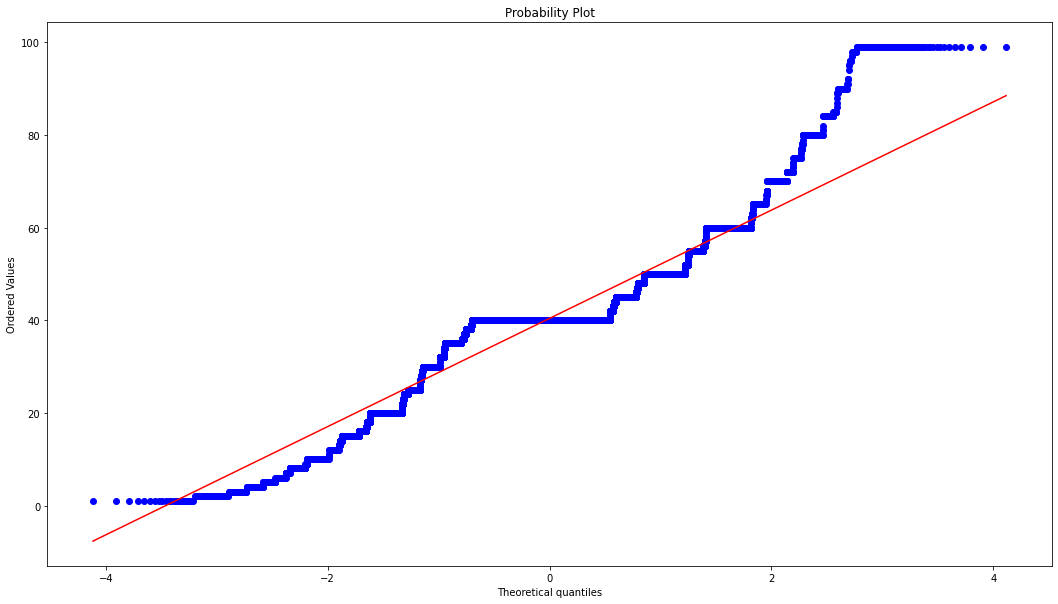

In [123]:
#checking if hours-per-week is normally distributed
fig, ax = plt.subplots(figsize=(18,10))
probplot(train_copy['hours-per-week'], dist="norm", plot=ax)
plt.show()

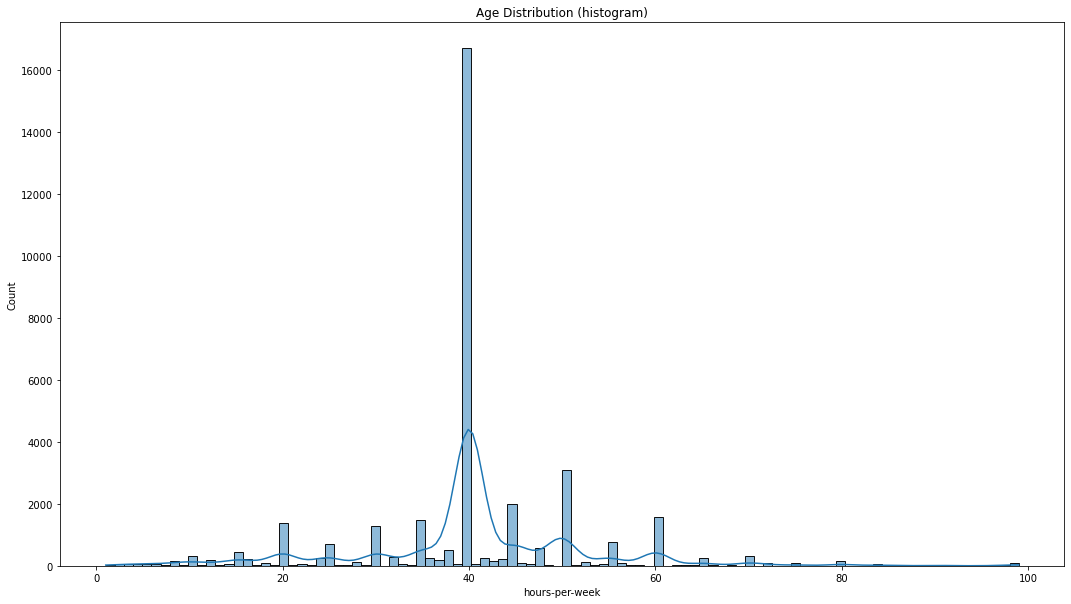

In [124]:
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(train_copy['hours-per-week'],bins=100,kde=True)
plt.title('Age Distribution (histogram)')
plt.show()

In [125]:
# TODO: Hours per week might be useful. will keep it

### 3.4.14 Native country

In [126]:
train_copy['native-country'].dtype

dtype('O')

In [127]:
train_copy['native-country'].isnull().sum()

584

In [128]:
value_cnt_norm_cal(train_copy,'native-country')

Count  Frequency (%)
United-States               32250         91.360
Mexico                        711          2.014
Philippines                   218          0.618
Puerto-Rico                   149          0.422
Germany                       136          0.385
Canada                        132          0.374
El-Salvador                   117          0.331
India                         110          0.312
England                       108          0.306
Cuba                           95          0.269
South korea                    90          0.255
China                          87          0.246
Jamaica                        83          0.235
Dominican-Republic             80          0.227
Italy                          75          0.212
Japan                          70          0.198
Guatemala                      65          0.184
Vietnam                        61          0.173
Poland                         58          0.164
Haiti                          57          0.161
Columbia                       53          0.150
Portugal                       52          0.147
Taiwan                         51          0.144
Iran                           43          0.122
Nicaragua                      40          0.113
Ecuador                        36          0.102
Peru                           35          0.099
Greece                         33          0.093
Ireland                        25          0.071
France                         24          0.068
Thailand                       21          0.059
Hong-Kong                      21          0.059
Cambodia                       21          0.059
Trinadad&Tobago                19          0.054
Outlying-US(Guam-USVI-etc)     16          0.045
Yugoslavia                     16          0.045
Honduras                       15          0.042
Hungary                        14          0.040
Laos                           12          0.034
Netherlands                     1          0.003

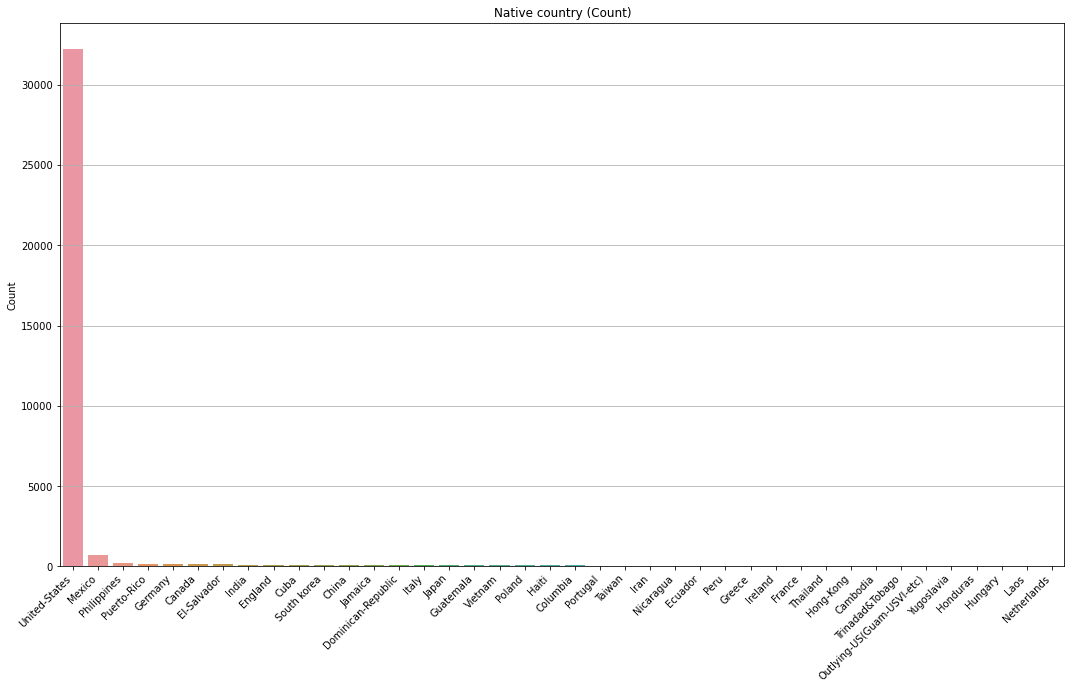

In [129]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'native-country').index, y=value_cnt_norm_cal(train_copy,'native-country')['Count'])
plt.title('Native country (Count)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

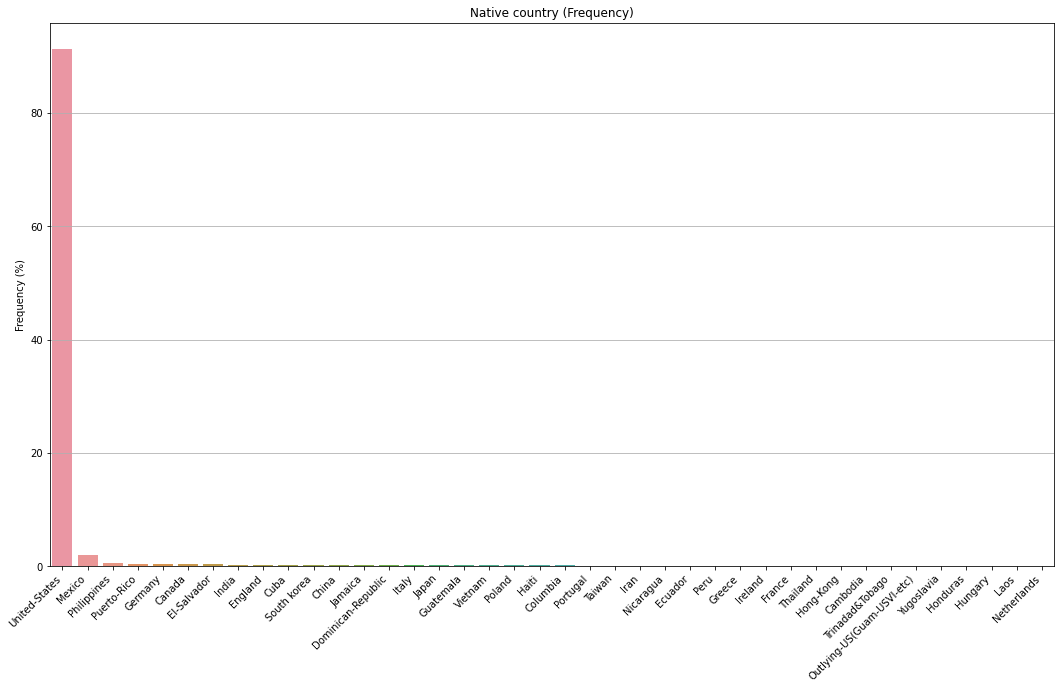

In [130]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'native-country').index, y=value_cnt_norm_cal(train_copy,'native-country')['Frequency (%)'])
plt.title('Native country (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()

In [131]:
# TODO: Native country might be useful but most of the datapoint represent United States. we might need to ingore the other countries.

### 3.4.15 Income > 50 K

In [132]:
train_copy['income_>50K'].dtype

dtype('float64')

In [133]:
train_copy['income_>50K'].isnull().sum()

717

In [134]:
value_cnt_norm_cal(train_copy,'income_>50K')

Count  Frequency (%)
0.000  26724         75.992
1.000   8443         24.008

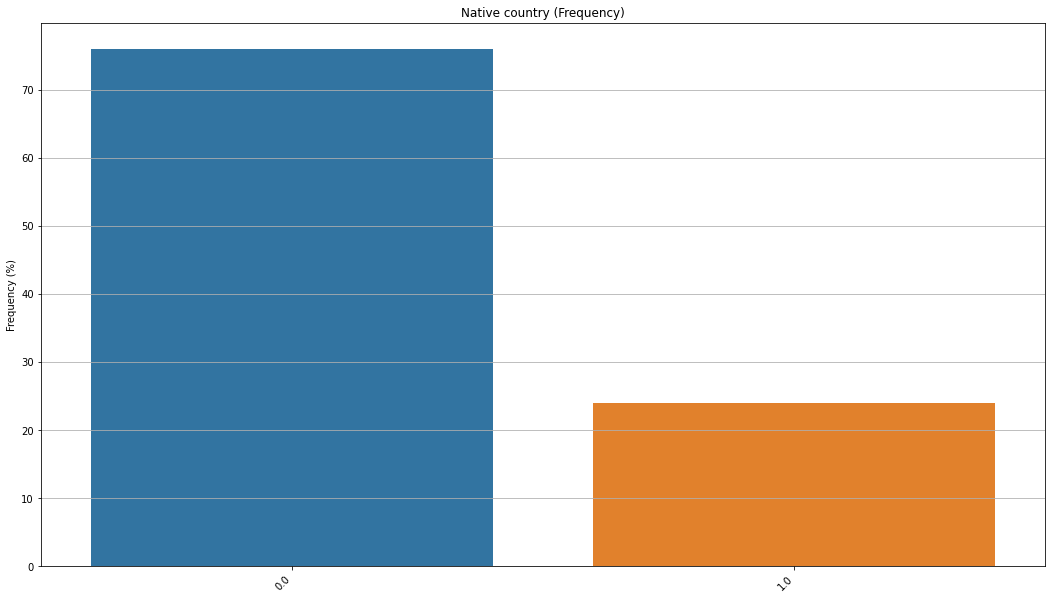

In [135]:
fig, ax = plt.subplots(figsize=(18,10))
sns.barplot(x=value_cnt_norm_cal(train_copy,'income_>50K').index, y=value_cnt_norm_cal(train_copy,'income_>50K')['Frequency (%)'])
plt.title('Native country (Frequency)')
plt.grid(True,axis='y')
plt.xticks(rotation=45,ha='right')
plt.show()


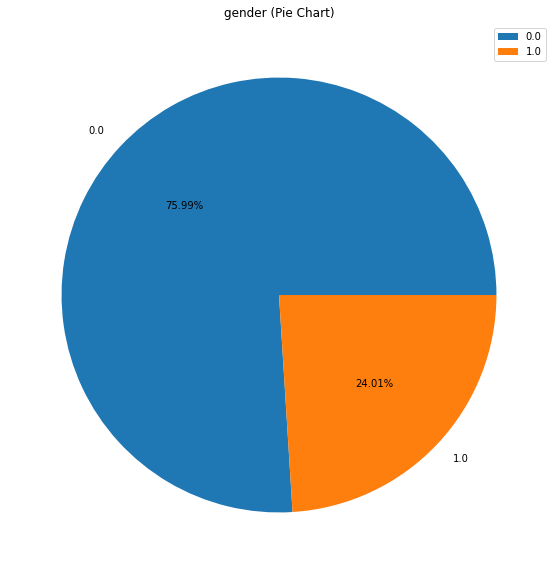

In [136]:
fig, ax = plt.subplots(figsize=(18,10))
plt.pie(train_copy['income_>50K'].value_counts(), labels=train_copy['income_>50K'].value_counts().index, autopct='%1.2f%%')
plt.title('gender (Pie Chart)')
plt.legend(loc='upper right')
plt.show()

In [137]:
# TODO: Our target is imbalance, we will need to oversample before training the model

## 3.5 For supervised learning tasks, identify the target attribute(s).

Tager attribute is the income > 50K

## 3.6 Visualize the data.

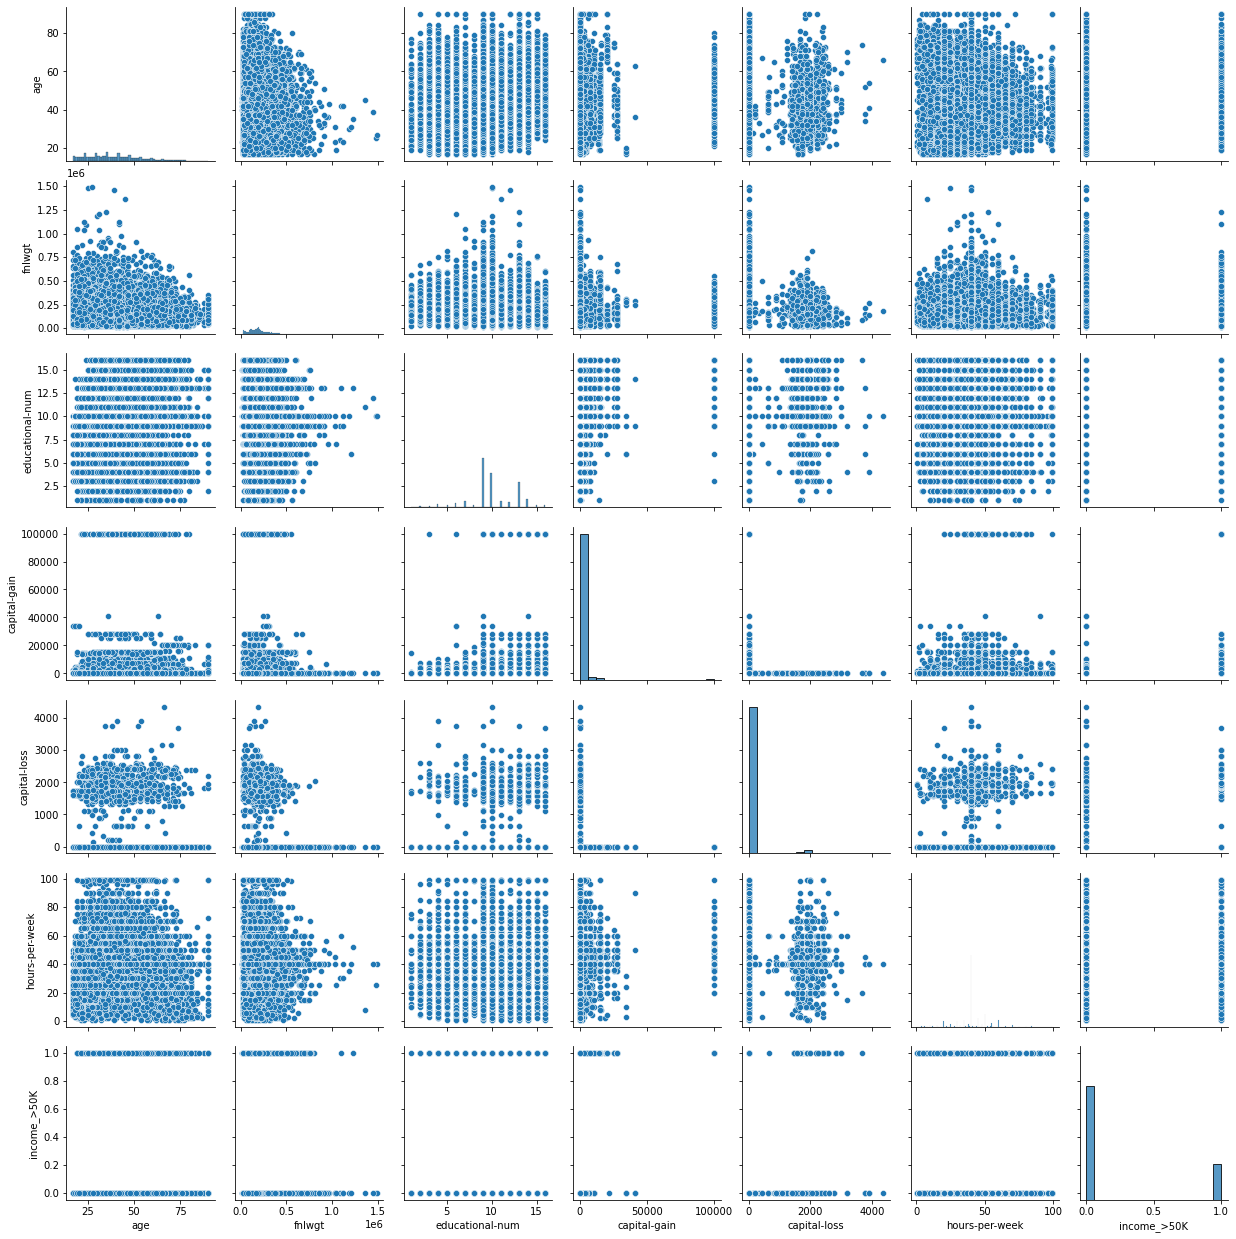

In [138]:
sns.pairplot(train_copy)
plt.show()

## 3.7 Study the pairwise interactions and correlations between attributes.

### 3.7.1 Age vs hours per week (Numerical vs Numerical feature)

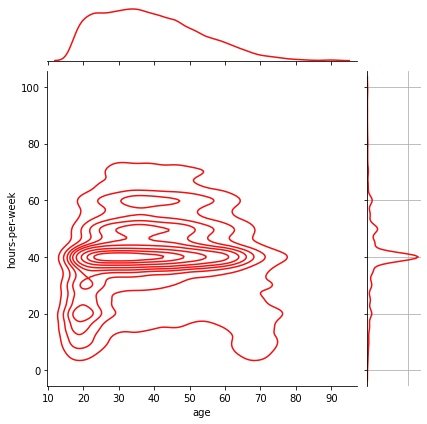

In [139]:
sns.jointplot(x='age', y='hours-per-week', data=train_copy, kind="kde", color="#f50f0f")
plt.grid()
plt.show()

### 3.7.2 Age vs educational number (Numerical vs Numerical feature)

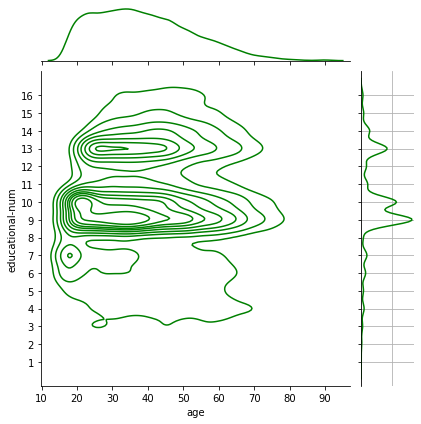

In [140]:
sns.jointplot(x='age', y='educational-num', data=train_copy, kind="kde", color="g")
plt.yticks(np.arange(1, train_copy['educational-num'].nunique()+1, 1))
plt.grid()
plt.show()

In [141]:
education_education_num_relation = pd.DataFrame(train_copy[['education','educational-num']].value_counts()).sort_values(by=['educational-num'], ascending=True).drop([0],axis=1)

In [142]:
education_education_num_relation

Empty DataFrame
Columns: []
Index: [(Preschool, 1), (1st-4th, 2), (5th-6th, 3), (7th-8th, 4), (9th, 5), (10th, 6), (11th, 7), (12th, 8), (HS-grad, 9), (Some-college, 10), (Assoc-voc, 11), (Assoc-acdm, 12), (Bachelors, 13), (Masters, 14), (Prof-school, 15), (Doctorate, 16)]

### 3.7.3 Educational-num vs hours-per-week (Numerical vs Numerical feature)

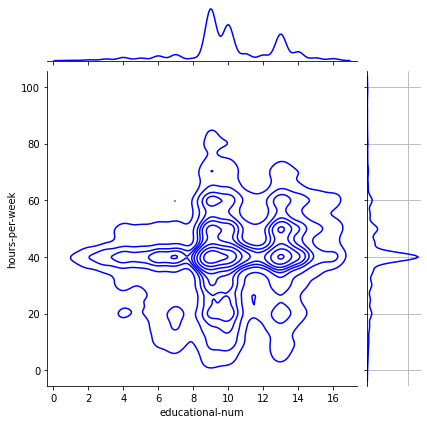

In [143]:
sns.jointplot(x='educational-num', y='hours-per-week', data=train_copy, kind="kde", color="b")
plt.grid()

### 3.7.4 Educational-num vs age (Numerical vs Numerical feature)

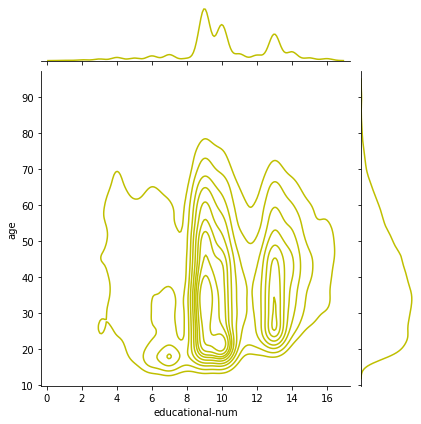

In [144]:
sns.jointplot(x='educational-num', y='age', data=train_copy, kind="kde", color="y")
plt.show()

### 3.7.5 Chi2 test for all the the categorical features (Categorical vs Categorical feature)

In [145]:
def chi2_test(feature_1,feature_2,show_contingency_table=False):
    # creating a cross tabulation of the two features
    feat_1_2_crosstab = pd.crosstab(train_copy[feature_1], train_copy[feature_2])
    stat, p, dof, cont_table = chi2_contingency(feat_1_2_crosstab)
    cont_table_df = pd.DataFrame(cont_table, index=feat_1_2_crosstab.index, columns=feat_1_2_crosstab.columns)
    # toggling the boolean to show the contingency table
    if show_contingency_table:
        print(cont_table_df)
    print('\n')
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('\n')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # Different implementation of chi2 test

    # df_ft_1 = df[feature_1].dropna(axis=0, how='any')
    # df_ft_2 = df[feature_2].dropna(axis=0, how='any')
    # data_crosstab = pd.crosstab(df_ft_1,df_ft_2,margins=True, margins_name="Total")

    # # significance level
    # alpha = 0.05

    # Calculation of Chisquare test statistics
    # chi_square = 0
    # rows = df_ft_1.unique()
    # columns = df_ft_2.unique()
    # for i in columns:
    #     for j in rows:
    #         O = data_crosstab[i][j]
    #         E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
    #         chi_square += (O-E)**2/E

    # # The p-value approach
    # print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
    # p_value = 1 - norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
    # conclusion = "Failed to reject the null hypothesis."
    # if p_value <= alpha:
    #     conclusion = "Null Hypothesis is rejected."
    # print("chisquare-score is:", chi_square, " and p value is:", p_value)
    # print(conclusion)
    # # The critical value approach
    # print("\n--------------------------------------------------------------------------------------")
    # print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    # critical_value = chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
    # conclusion = "Failed to reject the null hypothesis."
    # if chi_square > critical_value:
    #     conclusion = "Null Hypothesis is rejected."
    # print("chisquare-score is:", chi_square, " and p value is:", critical_value)
    # print(conclusion)

In [146]:
all_cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income_>50K']

In [147]:
for i in all_cat_features:
    for j in all_cat_features:
        chi2_test(i,j)



probability=0.950, critical=66.339, stat=237062.000
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=129.918, stat=2500.713
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=58.124, stat=1210.640
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=99.617, stat=9370.526
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=49.802, stat=1351.090
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=41.337, stat=475.627
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=14.067, stat=710.261
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (reject H0)


probability=0.950, critical=312.538, stat=486.891
Dependent (reject H0)


significance=0.050, p=0.000
Dependent (re

### 3.7.6 ANOVA test of age vs the rest of categoricals features (Numerical vs continuous feature)

In [148]:
all_cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income_>50K']

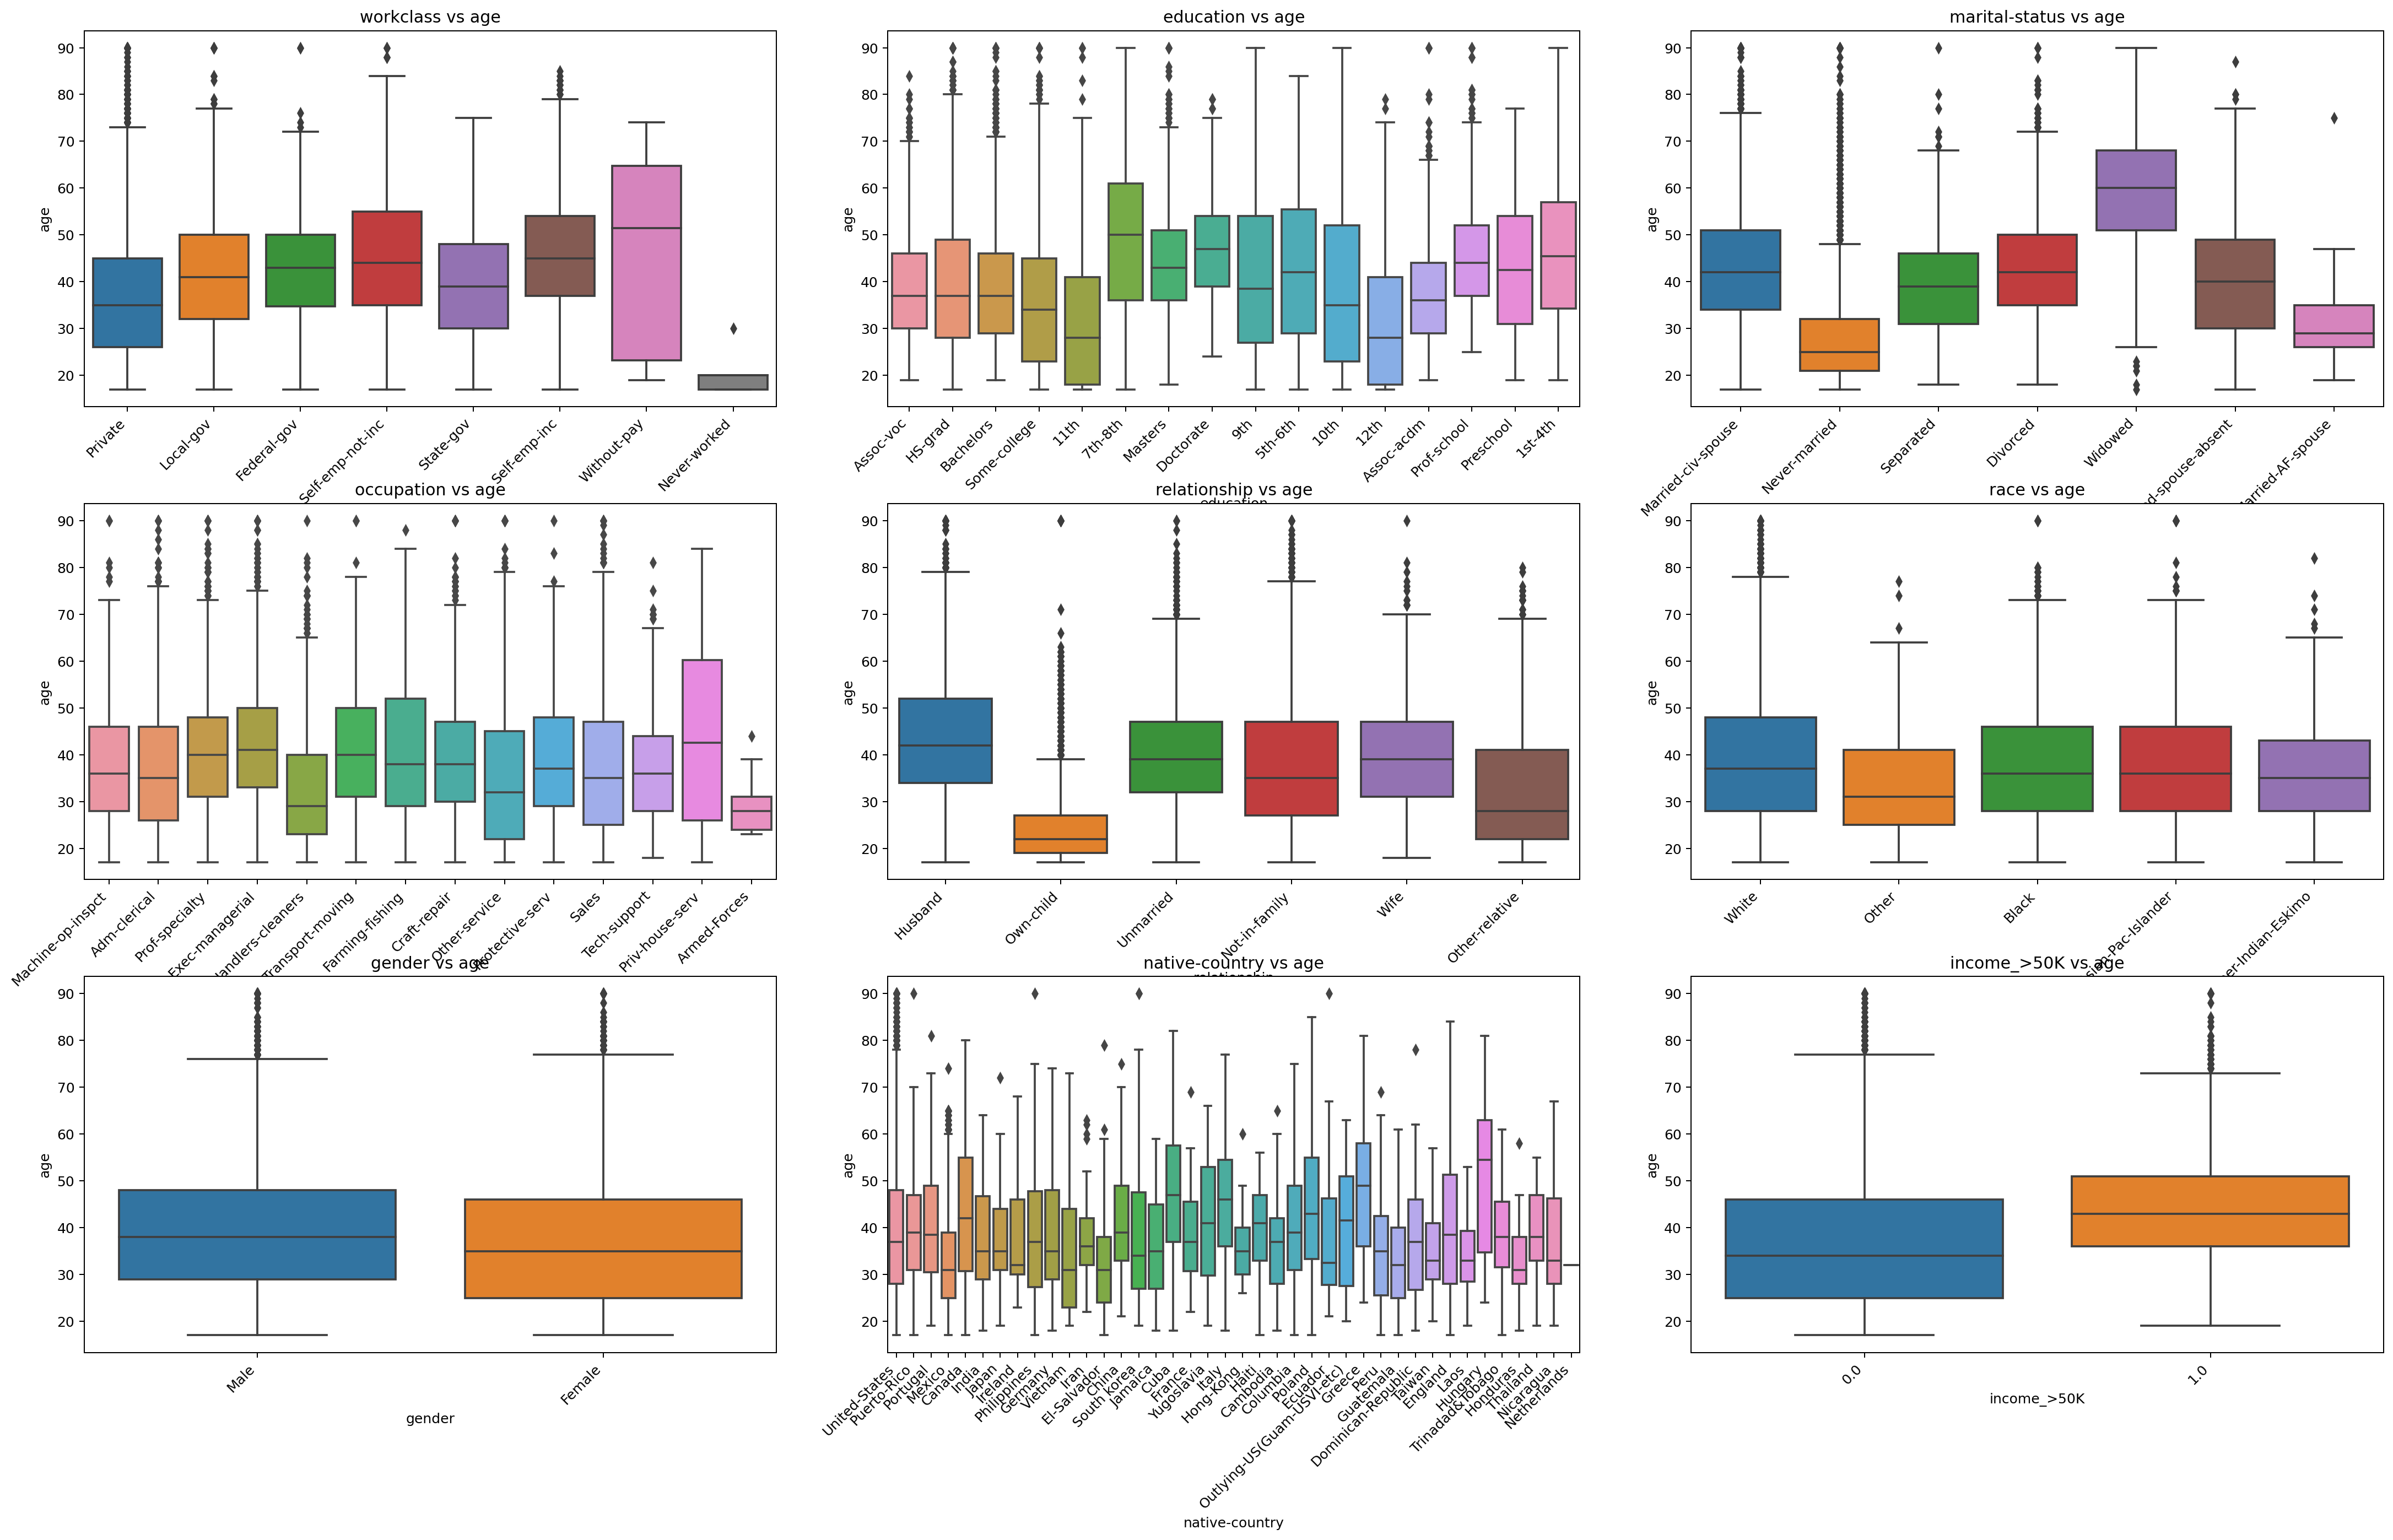

In [149]:
fig, axes = plt.subplots(3,3,figsize=(25,15),dpi=180)
fig.tight_layout(pad=5.0)

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(3):
        for col_count in range(3):
            sns.boxplot(ax=axes[row_count,col_count],x=train_copy[all_cat_features[cat_ft_count]],y=train_copy['age'])
            axes[row_count,col_count].set_title(all_cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,col_count])
            plt.xticks(rotation=45,ha='right')
            cat_ft_count += 1
    break

### 3.7.7 Correlation between features

In [150]:
train_copy_corr = train_copy.corr()

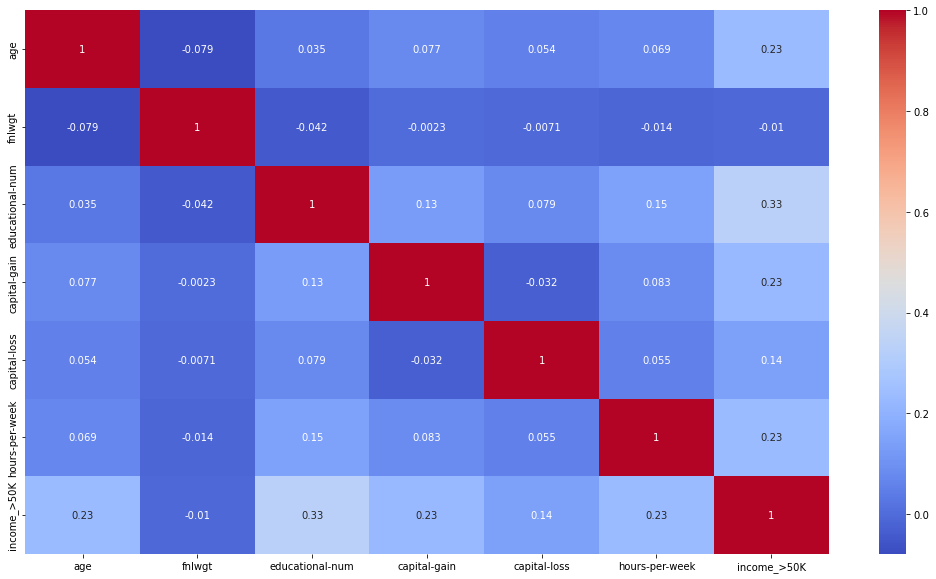

In [151]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(train_copy_corr, annot=True, cmap='coolwarm')
plt.show()

In [152]:
mask = np.zeros_like(train_copy_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
train_copy_corr[mask] = np.nan
(train_copy_corr
 .style
 .background_gradient(cmap='bwr', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
)

## 3.8 Study how you would solve the problem manually.

I would look at the correlation between the features and the target variable. the strongest correlation with the target variable is the age, educational-num, capital-gain and hours-per-week.

## 3.9 Identify the promising transformations you may want to apply.

Age:
- Drop outliers
- Min Max Scaling
- Fix skewness

Workclass:
- drop the feature because highly correlated with occupation with less information (To be done after running the model and seeing the feature importance method)
- one hot encoding

Fnwgt:
- drop the feature because there is no correlation with target

Education:
- One hot encoding

Education-num:
- drop the column(because we will use education feature)

Marital-status:
- One hot encoding
- Create a toggle that will use Marital-status, Relation or both to predict income

Occupation:
- One hot encoding
- Handle missing values

Relation:
- One hot encoding
- Create a toggle that will use Marital-status, Relation or both to predict income

Race:
- One hot encoding

Gender:
- One hot encoding

Capital gain:
- Fix skewness
- Min Max Scaling

Capital loss:
- Fix skewness
- Min Max Scaling

Hours per week:
- Min Max Scaling

Native country:
- Groupe countries into 3 GDP Categories (High, Medium, Low GDP)
- drop the feature because we have extracted the 3 GDP categories

GDP Category(extracted from the Native country):
- One hot encoding those categories

Income (Target):
- Fix imbalance data(SMOTE or oversampling)




## 3.10 Identify extra data that would be useful

In [153]:
# GDP data that will be used to group the countries by their GDP
# GDP data of countries in 1990
# Using 1990 data because the Train and test data is an old dataset. How do I know that? One of the country name is Yugoslavia which is no longer since the mid-1990's.
gdp_data = pd.read_csv('datasets/GDP.csv')

In [154]:
gdp_data.sort_values(by='1990' , inplace=True,ascending=False)

In [155]:
gdp_data.reset_index(inplace=True, drop=True)

In [156]:
gdp_data.rename(columns={'Country Name':'native-country','1990':'GDP_1990'},inplace=True)

In [157]:
gdp_data

native-country  GDP_1990
0                  Monaco 84303.880
1    United Arab Emirates 71359.170
2                  Brunei 54713.545
3           Liechtenstein 49373.610
4              Luxembourg 29664.795
..                    ...       ...
191           Afghanistan   292.000
192            Mozambique   244.601
193               Eritrea   147.000
194               Somalia   126.920
195              Cambodia   100.000

[196 rows x 2 columns]

In [158]:
def add_gdp_data(train_copy,test_copy,gdp_data):
        full_data_copy = pd.concat([train_copy,test_copy],ignore_index=True)
        gdp_group = []
        for idx in gdp_data.index:
            if idx <= 65:
                gdp_group.append('High GDP')
            elif idx >= 65 and idx <= 130:
                gdp_group.append('Medium GDP')
            else:
                gdp_group.append('Low GDP')

        # concatenate the gdp_data with the gdp_group list
        gdp_data = pd.concat([gdp_data.rename(columns={'country':'native-country'}), pd.Series(gdp_group, name='GDP Group')], axis=1)
        # we no longer need the GDP column, so let's drop it
        gdp_data.drop(['GDP_1990'],axis=1,inplace=True)

        # we need to merge the gdp_data with X dataframe
        full_data_copy = pd.merge(full_data_copy, gdp_data, on='native-country', how='left')
        # make income_>50K the last column
        new_col_order = [col for col in full_data_copy.columns if col != 'income_>50K'] + ['income_>50K']
        return full_data_copy[new_col_order]


In [159]:
full_data_copy = add_gdp_data(train_copy,test_copy,gdp_data)

In [160]:
train_copy, test_copy = data_split(full_data_copy,0.2)

## 3.11 Document what you have learned.

All the categorical features are highly correlated (category vs category) and the age and marital status, relationship are highly correlated (numerical vs continuous), finally target is highly correlated with the education, capital gain, age, hour-per-week (numerical vs numerical). 

# 4. Prepare the data for the model

## 4.1 Data cleaning

### 4.1.1 Fix or remove outliers

In [161]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_outliers = ['age']):
        self.col_with_outliers = col_with_outliers
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.col_with_outliers).issubset(X.columns)):
            Q1 = X[self.col_with_outliers].quantile(.25)
            Q3 = X[self.col_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            outlier_condition = (X[self.col_with_outliers] < (Q1 - 1.5 * IQR)) | (X[self.col_with_outliers] > (Q3 + 1.5 * IQR))
            index_to_keep = X[~outlier_condition.any(axis=1)].index
            return X.loc[index_to_keep]
        else:
            print("Columns not found")
            return X

### 4.1.2 Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).

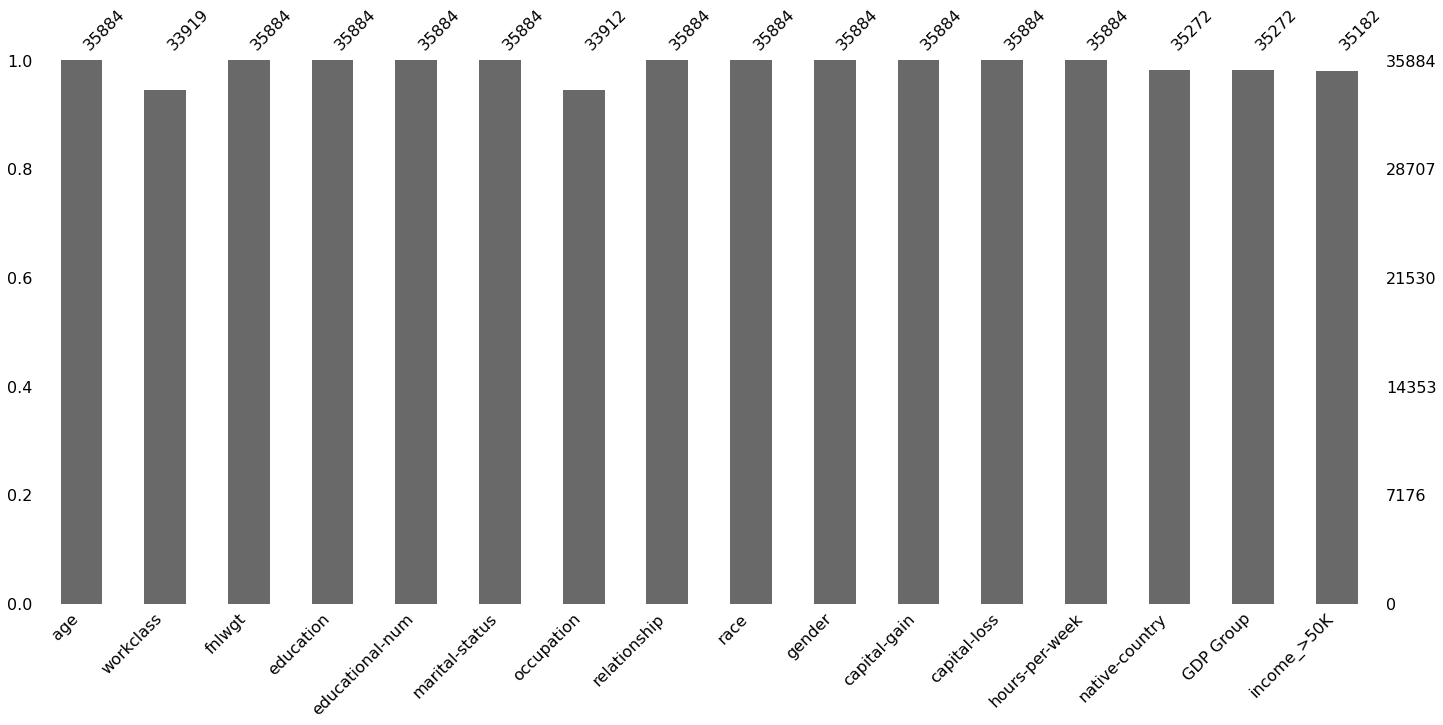

In [162]:
msno.bar(train_copy)
plt.show()

In [163]:
class MissingValHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        # drop all the rows with missing values in X
        X.dropna(inplace=True)
        X.reset_index(inplace=True, drop=True)
        return X

## 4.2 Feature selection

Performed later when we have select found the least predictive features

## 4.3 Feature Engineering and Transformation

In [164]:
# TODO: create a function that takes in the country and returns the 3 GDP categorories. This will be useful with the streamlit interface input.

In [165]:
def get_gdp_group(country_name):
    # To be implemented
    pass

### 4.1.3.2 Skewness fixings

For more information, refere to [this post](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55)

In [166]:
class SkewnessHandler(BaseEstimator, TransformerMixin):
    def __init__(self,col_with_skewness=['age','capital-gain','capital-loss']):
        self.col_with_skewness = col_with_skewness
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.col_with_skewness).issubset(X.columns)):
            # Handle skewness with cubic root transformation
            X[self.col_with_skewness] = np.cbrt(X[self.col_with_skewness])
            return X
        else:
            print('One or more skewed columns are not found')
            return X

### 4.1.3.3 Oversampling with SMOTE

In [167]:
class OversampleSMOTE(BaseEstimator,TransformerMixin):
    def __init__(self, perform_oversampling = True):
        self.perform_oversampling = perform_oversampling
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        # function to oversample the minority class
        if self.perform_oversampling:
            smote = SMOTE()
            X_bal, y_bal = smote.fit_resample(X.iloc[:,:-1],X.iloc[:,-1])
            X_y_bal = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)
            return X_y_bal
        else:
            print("No oversampling performed")
            return X

## 4.4 Feature scaling

Will be applied directly in the column transformer/pipeline because they are built in functions

## 4.5 Apply the column transformer and pipeline

In [168]:
def smote_pipeline_fuc(df):
    smote_pipeline = Pipeline([
        ('smote', OversampleSMOTE()) # default: perform_oversampling = True
    ])
    smote_pip_result = smote_pipeline.fit_transform(df)
    return smote_pip_result


In [169]:
def concat_fuc(df_ordinal_minmax, df_onehot, df_target):
    concat_df = pd.concat([df_ordinal_minmax, df_onehot, df_target], axis=1)
    return concat_df

In [170]:
def one_hot_enc_fuc(df):
    columns_to_one_hot_enc = ['race', 'gender', 'workclass', 'occupation','marital-status', 'relationship']
    one_hot_enc = OneHotEncoder()
    one_hot_enc.fit(df[columns_to_one_hot_enc])
    # get the result of the one hot encoding columns names
    cols_names_one_hot_enc = one_hot_enc.get_feature_names_out(columns_to_one_hot_enc)
    # change the array of the one hot encoding to a dataframe with the column names
    one_hot_result_with_names_col = pd.DataFrame(one_hot_enc.transform(df[columns_to_one_hot_enc]).toarray(),columns=cols_names_one_hot_enc)
    return one_hot_result_with_names_col

In [171]:
def ordinal_minmax_scaler_fuc(df):
    columns_to_ordinal_enc = ['education', 'GDP Group']
    columns_to_scale = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
    col_transformer = ColumnTransformer([
    ('Ordinal encoder',OrdinalEncoder(),columns_to_ordinal_enc), # ordinal encoding for education and GDP Group because they are ranked
    ('Min max scaler',MinMaxScaler(),columns_to_scale)]) # scaling for age, capital-gain, capital-loss, hours-per-week
    ordinal_minmax_scaler_result = col_transformer.fit_transform(df)
    ordinal_minmax_scaler_result_with_names_col = pd.DataFrame(ordinal_minmax_scaler_result,columns=columns_to_ordinal_enc+columns_to_scale)
    return ordinal_minmax_scaler_result_with_names_col

In [172]:
def extract_target_col(df):
    target = df.iloc[:,-1].to_frame().reset_index(drop=True)
    return target

In [173]:
def initial_pipeline_fuc(df):
    init_pipeline = Pipeline([
        ('Missing values handler', MissingValHandler()), # drop missing values in the whole dataset
        ('Outliers handler', OutlierHandler()),
        ('Skewness handler', SkewnessHandler()), # columns with skewness are 'age','capital-gain','capital-loss'
    ])
    init_pip_result = init_pipeline.fit_transform(df)
    return init_pip_result

In [174]:
def full_pipeline_fuc(df):
    # initial pipeline
    init_pip_result = initial_pipeline_fuc(df)
    #extracting the target variable
    target = extract_target_col(init_pip_result)
    # column transformers to apply ordinal and minmax transformation on specific columns
    ordinal_minmax_result = ordinal_minmax_scaler_fuc(init_pip_result)
    #one hot encoding
    one_hot_enc_result = one_hot_enc_fuc(init_pip_result)
    # concat the result from the ordinal and minmax transformation and one hot encoding with the target variable
    encoded_concat_result = concat_fuc(ordinal_minmax_result,one_hot_enc_result,target)
    # balance the imbalance data with smote function
    smote_pip_result = smote_pipeline_fuc(encoded_concat_result)
    return smote_pip_result

In [175]:
train_copy.head(2)

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   51  State-gov  105943       HS-grad                9  Married-civ-spouse   
1   38  Local-gov   34744  Some-college               10            Divorced   

     occupation relationship   race  gender  capital-gain  capital-loss  \
0  Adm-clerical         Wife  White  Female          3908             0   
1  Adm-clerical    Unmarried  White  Female             0             0   

   hours-per-week native-country GDP Group  income_>50K  
0              40  United-States  High GDP        0.000  
1              38  United-States  High GDP        0.000

In [176]:
train_copy_prep = full_pipeline_fuc(train_copy)
train_copy_prep.shape
train_copy_prep.head(2)

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0     11.000      0.000 0.691         0.339         0.000           0.398   
1     15.000      0.000 0.480         0.000         0.000           0.378   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                    0.000                    0.000       0.000       0.000   
1                    0.000                    0.000       0.000       0.000   

   ...  marital-status_Never-married  marital-status_Separated  \
0  ...                         0.000                     0.000   
1  ...                         0.000                     0.000   

   marital-status_Widowed  relationship_Husband  relationship_Not-in-family  \
0                   0.000                 0.000                       0.000   
1                   0.000                 0.000                       0.000   

   relationship_Other-relative  relationship_Own-child  \
0                        0.000                   0.000   
1                        0.000                   0.000   

   relationship_Unmarried  relationship_Wife  income_>50K  
0                   0.000              1.000        0.000  
1                   1.000              0.000        0.000  

[2 rows x 48 columns]

In [177]:
pd.set_option('display.max_columns', None)
train_copy_prep

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0         11.000      0.000 0.691         0.339         0.000           0.398   
1         15.000      0.000 0.480         0.000         0.000           0.378   
2         11.000      0.000 0.238         0.000         0.000           0.296   
3         11.000      0.000 0.260         0.000         0.764           0.398   
4         15.000      1.000 0.166         0.000         0.000           0.398   
...          ...        ...   ...           ...           ...             ...   
48859     14.000      0.000 0.799         0.000         0.844           0.287   
48860     15.000      0.000 0.614         0.000         0.775           0.500   
48861      7.000      0.000 0.642         0.000         0.000           0.420   
48862     15.000      0.000 0.496         0.000         0.000           0.398   
48863     11.000      0.000 0.523         0.000         0.000           0.398   

       race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  \
0                        0.000                    0.000       0.000   
1                        0.000                    0.000       0.000   
2                        0.000                    0.000       0.000   
3                        0.000                    0.000       0.000   
4                        0.000                    1.000       0.000   
...                        ...                      ...         ...   
48859                    0.000                    0.000       0.000   
48860                    0.000                    0.000       0.000   
48861                    0.000                    0.000       0.000   
48862                    0.000                    0.000       0.000   
48863                    0.000                    0.000       0.000   

       race_Other  race_White  gender_Female  gender_Male  \
0           0.000       1.000          1.000        0.000   
1           0.000       1.000          1.000        0.000   
2           0.000       1.000          1.000        0.000   
3           0.000       1.000          0.000        1.000   
4           0.000       0.000          0.000        1.000   
...           ...         ...            ...          ...   
48859       0.000       1.000          0.000        1.000   
48860       0.000       1.000          0.000        1.000   
48861       0.000       1.000          0.000        1.000   
48862       0.000       1.000          1.000        0.000   
48863       0.000       1.000          0.000        1.000   

       workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0.000                0.000              0.000   
1                      0.000                1.000              0.000   
2                      0.000                0.000              0.000   
3                      0.000                0.000              0.000   
4                      0.000                0.000              1.000   
...                      ...                  ...                ...   
48859                  0.000                0.000              0.000   
48860                  0.000                0.000              1.000   
48861                  0.000                0.000              1.000   
48862                  0.000                0.000              1.000   
48863                  0.000                0.000              1.000   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                       0.000                       0.000   
1                       0.000                       0.000   
2                       0.000                       0.000   
3                       1.000                       0.000   
4                       0.000                       0.000   
...                       ...                         ...   
48859                   0.000                       1.000   
48860                   0.000                       0.000   
48861                   0.000     

In [246]:
test_copy_prep = full_pipeline_fuc(test_copy)
test_copy_prep.shape

(12022, 48)

In [247]:
X_train_copy_prep = train_copy_prep.iloc[:,:-1]
X_train_copy_prep.shape

(48864, 47)

In [248]:
y_train_copy_prep = train_copy_prep.iloc[:,-1]
y_train_copy_prep.shape

(48864,)

In [249]:
X_test_copy_prep = test_copy_prep.iloc[:,:-1]
X_test_copy_prep.shape

(12022, 47)

In [250]:
y_test_copy_prep = test_copy_prep.iloc[:,-1]
y_test_copy_prep.shape

(12022,)

# 5. Shorlist promising models

## 5.0 Functions to evaluate the models and all the metrics

In [183]:
def create_summary_table(summary_data):
    summary_table_col = [
        'Model name',
        'Precision score (Validation set)',
        'Recall score (Validation set)',
        'F1 score (Validation set)',
        'Accuracy score (Validation set)',
        'AUC score (Validation set)',
        'AUC score (Train set)',
        'Has overfit (AUC score (Train set) > AUC score (Validation set))',
        'Confusion matrix',
        'Roc auc curve',
        'Top 10 important features',
        'Top 10 useless features',
        'Top 10 important features plot',
        'Top 10 useless features plot',
        ]
    print('\n       ***************  Metrics Summary Table  ***************\n')
    # print all the models summary and gave the width and height to the plot
    summary_df = pd.DataFrame(summary_data, columns=summary_table_col).iloc[[4,6,7,9,10]].style.set_properties(subset=['Confusion matrix','Roc auc curve', 'Top 10 important features plot', 'Top 10 useless features plot'], **{'width': '600px','height': '600px'})
    # print only knn, random forest, NN, bagging, gradient boosting
    display(HTML(summary_df.to_html()))
    #return summary_df

In [184]:
def top_and_worst_feat_fuc(col_with_coef):
    top_10_feat, worst_10_feat = col_with_coef[:10], col_with_coef[-10:]
    top_10_feat_str = ""
    worst_10_feat_str = ""
    for count,feat in enumerate(top_10_feat, start=1):
        # top 10 features string formatting
        top_10_feat_str += "{0}. feature name: {1}".format(count,feat[0])+ "<br>" + "coefficient: {:.4f}".format(feat[1]) + "<br>"
    for count,feat in enumerate(worst_10_feat, start=1):
        # worst 10 features string formatting
        worst_10_feat_str += "{0}. feature name: {1}".format(count,feat[0])+ "<br>" + "coefficient: {:.4f}".format(feat[1]) + "<br>"
    return top_10_feat_str, worst_10_feat_str

In [185]:
def check_overfit(auc_score_val_set, auc_score_train_set):
    # if the auc score of the training set is higher than the validation set by more than 0.03, then the model is overfitting
    if (auc_score_train_set - auc_score_val_set) > 0.03:
        return True
    else:
        return False

In [186]:
summary_data = []
def growing_summary_table_fuc(model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html):
    if col_with_coef == 'No coeficient or feature importance for this model':
        each_clf_data = [model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef, col_with_coef, col_with_coef]
        summary_data.append(each_clf_data)
    else:
        top_10_feat, worst_10_feat = top_and_worst_feat_fuc(col_with_coef)
        each_clf_data = [model_name,precision_score,recall_score,f1_score, accuracy_score, auc_score_val_set, auc_score_train_set, is_overfitting, img_conf_matrix, img_roc_auc, top_10_feat, worst_10_feat, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html]
        summary_data.append(each_clf_data)

In [187]:
def roc_curve_fuc(model_trn,model_name,X_train_copy_prep,y_train_copy_prep):
    # path to save the roc curve
    roc_curve_path = Path('saved_preliminary_models/{0}/{0}_roc_curve.jpg'.format(model_name))
    try:
        roc_curve_path.resolve(strict=True)
    except FileNotFoundError:
        print('\n                ROC curve\n')
        lower_than_50k_probs = [0 for _ in range(len(y_train_copy_prep))]
        higher_than_50k_probs = model_trn.predict_proba(X_train_copy_prep)
        higher_than_50k_probs_pos_outcome = higher_than_50k_probs[:,1]
        lower_than_50k_auc = roc_auc_score(y_train_copy_prep,lower_than_50k_probs)
        higher_than_50k_probs_auc = roc_auc_score(y_train_copy_prep,higher_than_50k_probs_pos_outcome)
        #save the auc
        with open('saved_preliminary_models/{0}/lower_than_50k_auc_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(lower_than_50k_auc,handle)
        with open('saved_preliminary_models/{0}/higher_than_50k_probs_auc_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(higher_than_50k_probs_auc,handle)
        # print the auc
        print('Income lower than 50k: ROC AUC=%.3f' % (lower_than_50k_auc))
        print('Income higher than 50k: ROC AUC=%.3f' % (higher_than_50k_probs_auc))
        lower_than_50k_false_pos_rate, lower_than_50k_true_pos_rate, _ = roc_curve(y_train_copy_prep,lower_than_50k_probs)
        higher_than_50k_false_pos_rate, higher_than_50k_true_pos_rate, _ = roc_curve(y_train_copy_prep,higher_than_50k_probs_pos_outcome)
        plt.plot(lower_than_50k_false_pos_rate, lower_than_50k_true_pos_rate, linestyle='--', label='Income lower than 50k')
        plt.plot(higher_than_50k_false_pos_rate, higher_than_50k_true_pos_rate, marker='.', label='Income higher than 50k')
        # axis labels
        plt.xlabel('False Positive Rate (Precision)')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('ROC curve')
        # show the legend
        plt.legend()
        # save the plot
        plt.savefig('saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name))
        # show the plot
        plt.show()
        # creating the html roc auc curve image
        img_roc_auc = '<img src="'+ 'saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name) + '">'
        return higher_than_50k_probs_auc, img_roc_auc
    else:
        # if roc curve path exists, load the auc first
        with open('saved_preliminary_models/{0}/lower_than_50k_auc_{0}.pickle'.format(model_name),'rb') as handle:
                lower_than_50k_auc = pickle.load(handle)
        with open('saved_preliminary_models/{0}/higher_than_50k_probs_auc_{0}.pickle'.format(model_name),'rb') as handle:
                higher_than_50k_probs_auc = pickle.load(handle)
        # print the auc
        print('Income lower than 50k: ROC AUC=%.3f' % (lower_than_50k_auc))
        print('Income higher than 50k: ROC AUC=%.3f' % (higher_than_50k_probs_auc))
        # read the ROC image
        img_roc = mpimg.imread('saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name))
        # plot the ROC image
        img_roc_plot = plt.imshow(img_roc)
        #remove the axis
        plt.axis('off')
        # show the plot
        plt.show()
        # creating the html roc auc curve image
        img_roc_auc = '<img src="'+ 'saved_preliminary_models/{0}/{0}_ROC_curve.jpg'.format(model_name) + '">'
        return higher_than_50k_probs_auc, img_roc_auc


In [188]:
def confusion_matrix_fuc(model_name,y_train_copy_prep,y_train_copy_pred):
    #path to save the confusion matrix
    confusion_matrix_path = Path('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
    try:
        #check if the path exists
        confusion_matrix_path.resolve(strict=True)
    except FileNotFoundError:
        print('\n         Confusion Matrix\n')
        #plot confusion matrix
        confusion_matrix = ConfusionMatrixDisplay.from_predictions(y_train_copy_prep,y_train_copy_pred, cmap='Blues',values_format='d')
        #give a title to the plot using the model name
        plt.title('Confusion Matrix')
        #save the plot as jpg
        plt.savefig('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
        #show the plot
        plt.show()
        #img_conf_matrix = 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name)
        img_conf_matrix_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name) + '">'
        return img_conf_matrix_html
    else:
        img_conf_matrix_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name) + '">'
        img_conf_matrix = mpimg.imread('saved_preliminary_models/{0}/{0}_confusion_matrix.jpg'.format(model_name))
        # plot the confusion matrix image
        img_conf_matrix_plot = plt.imshow(img_conf_matrix)
        # disable the axis
        plt.axis('off')
        plt.show()
        return img_conf_matrix_html

In [189]:
def scores_cal_fuc(model_name,X_train_copy_prep,y_train_copy_prep):
    score_list = ['precision','recall','f1','accuracy','roc_auc']
    scores = []
    scores_mean_for_each_type = []
    scores_mean = 0
    scores_std = 0
    # path to save the model folder
    model_dir_path = Path('saved_preliminary_models/{0}/'.format(model_name))
    files_start_with_score_path = []
    #for loop to check if there is any file start with 'score' in the model folder
    for i in os.listdir(model_dir_path):
        if os.path.isfile(os.path.join(model_dir_path,i)) and 'score' in i:
            files_start_with_score_path.append(os.path.join(model_dir_path,i))
    # file that start with 'score' found, load the scores list, mean and std using pickle
    if files_start_with_score_path:
        for score_type in score_list:
            # load the scores list
            with open('saved_preliminary_models/{0}/score_{1}_list.pickle'.format(model_name,score_type),'rb') as handle:
                scores = pickle.load(handle)
            # load the mean score
            with open('saved_preliminary_models/{0}/score_{1}_mean.pickle'.format(model_name,score_type),'rb') as handle:
                scores_mean = pickle.load(handle)
                scores_mean_for_each_type.append(scores_mean)
            # load the std score
            with open('saved_preliminary_models/{0}/score_{1}_std.pickle'.format(model_name,score_type),'rb') as handle:
                scores_std = pickle.load(handle)
            print('\n                        {} score\n'.format(score_type))
            print('Scores: {}\n'.format(scores))
            print('Mean of the scores: {}\n'.format(scores_mean))
            print('Standard deviation of the scores: {}\n\n'.format(scores_std))
        return scores_mean_for_each_type
    # no file start with score in the model folder
    else:
        for score_type in score_list:
            # calculate the scores for each score type using kfold cross validation
            scores = cross_val_score(model,X_train_copy_prep,y_train_copy_prep,scoring=score_type,cv=10,n_jobs=-1)
            scores_mean = scores.mean()
            scores_mean_for_each_type.append(scores_mean)
            scores_std = scores.std()
            print('\n                        {} score\n'.format(score_type))
            print('Scores: {}\n'.format(scores))
            print('Mean of the scores: {}\n'.format(scores_mean))
            print('Standard deviation of the scores: {}\n\n'.format(scores_std))
            # save the scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_list.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores,handle)
            # save the mean scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_mean.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores_mean,handle)
            # save the standard deviation scores using pickle
            with open('saved_preliminary_models/{0}/score_{1}_std.pickle'.format(model_name,score_type),'wb') as handle:
                pickle.dump(scores_std,handle)
        return scores_mean_for_each_type

In [190]:
def classification_report_fuc(model_name,y_train_copy_prep,y_train_copy_pred):
    # path to save the classification report
    class_rep_path = Path('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name))
    try:
        #check if the path exists
        class_rep_path.resolve(strict=True)
    except FileNotFoundError:
        #cross validation prediction with kfold = 10
        print('\n                Classification Report\n')
        #classification report
        cls_rep = classification_report(y_train_copy_prep,y_train_copy_pred)
        print(cls_rep)
        # save the classification report
        with open('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name),'wb') as handle:
            pickle.dump(cls_rep,handle)
        return cls_rep
    else:
        # if it exist load the classification report
        with open('saved_preliminary_models/{0}/class_rep_{0}.pickle'.format(model_name),'rb') as handle:
            cls_rep = pickle.load(handle)
            print('                       {} Classification Report\n'.format(model_name))
            print(cls_rep)
            return cls_rep

In [191]:
def load_coef_and_plot(model_name):
    with open('saved_preliminary_models/{0}/coef_{0}.pickle'.format(model_name),'rb') as handle:
        col_with_coef = pickle.load(handle)
    # print the coefficients of the model
    # print("\nCoefficients for feature importance:\n")
    # [print(i) for i in col_with_coef]
    # print('\n')
    # load top 10 features image and plot it
    img_col_with_coef_df_top_10 = mpimg.imread('saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name))
    # plot the confusion matrix image
    img_col_with_coef_df_top_10_plot = plt.imshow(img_col_with_coef_df_top_10)
    #remove the axis
    plt.axis('off')
    plt.show()
    # load bottom 10 features image and plot it
    img_col_with_coef_df_bottom_10 = mpimg.imread('saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name))
    # plot the confusion matrix image
    img_col_with_coef_df_bottom_10_plot = plt.imshow(img_col_with_coef_df_bottom_10)
    #remove the axis
    plt.axis('off')
    plt.show()
    # save the top 10 features plot to a html tag
    col_with_coef_df_top_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name) + '">'
    # save the bottom 10 features plot to a html tag
    col_with_coef_df_bottom_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name) + '">'

    return col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html


In [192]:
def fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef):
    columns_names = X_train_copy_prep.columns
    col_with_coef = list(zip(columns_names,coef))
    col_with_coef.sort(key=lambda x: x[1],reverse=True)
    # print("\nCoefficients for feature importance:\n")
    # [print(i) for i in col_with_coef]
    # print('\n')
    # horizontal bar plot of the top 10 features
    col_with_coef_df_top_10 = pd.DataFrame(col_with_coef[:10], columns=['Columns','Coefficients'])
    # horizontal bar plot of the bottom 10 features
    col_with_coef_df_bottom_10 = pd.DataFrame(col_with_coef[-10:], columns=['Columns','Coefficients'])
    sns.barplot(y=col_with_coef_df_top_10['Columns'],x=col_with_coef_df_top_10['Coefficients'])
    # plot title top 10
    plt.title('Top 10 most predictive features')
    # save the plot to a jpg file
    plt.savefig('saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name))
    plt.show()
    sns.barplot(y=col_with_coef_df_bottom_10['Columns'],x=col_with_coef_df_bottom_10['Coefficients'])
    # plot title bottom 10
    plt.title('Top 10 least predictive features')
    # save the plot to a jpg file
    plt.savefig('saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name))
    plt.show()
    # save the coefficients of the model to pickle
    with open('saved_preliminary_models/{0}/coef_{0}.pickle'.format(model_name),'wb') as handle:
        pickle.dump(col_with_coef,handle)
    # save the top 10 features plot to a html tag
    col_with_coef_df_top_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_top_10.jpg'.format(model_name) + '">'
    # save the bottom 10 features plot to a html tag
    col_with_coef_df_bottom_10_html = '<img src="' + 'saved_preliminary_models/{0}/{0}_bottom_10.jpg'.format(model_name) + '">'

    return col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html

In [193]:
col_with_coef = []
def folder_and_file_model_check(model, model_name, X_train_copy_prep, y_train_copy_prep):
    col_with_coef_df_top_10_html = ''
    col_with_coef_df_bottom_10_html = ''
    # check if the folder with the model name exist and if not create them
    if not os.path.exists('saved_preliminary_models/{}'.format(model_name)):
        os.makedirs('saved_preliminary_models/{}'.format(model_name))
    # check if the model file exist and if not create, train and save it
    model_file_path = Path('saved_preliminary_models/{0}/{0}_model.sav'.format(model_name))
    try:
        model_file_path.resolve(strict=True)
    except FileNotFoundError:
        model_trn = model.fit(X_train_copy_prep,y_train_copy_prep)
        joblib.dump(model_trn,model_file_path)
        # coeficient of the model for feature importance using switch-case statement [new in Python 3.10]
        match model_name:
            # for sgd, logistic regression and linear discriminant analysis, use coef_
            case 'SGD' | 'Logistic_regression' | 'Linear_discriminant_analysis':
                coef_of_each_feat = model_trn.coef_[0]
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            #  no coefficients for the svm model as it took a while to train
            case 'Support_vector_machine':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            # for decision tree, random forest, gradient boosting, adaboost and Extra_trees, use feature_importances_
            case 'Decision_tree' | 'Random_forest' | 'Gradient_boosting' | 'AdaBoost' | 'Extra_trees':
                coef_of_each_feat = model_trn.feature_importances_
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # does not have does not offer an intrinsic method to evaluate feature importance. refer to https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes, will use permutation_importance
            case 'Gaussian_naive_bayes':
                #Gaussian naive uses the permutation importance method to evaluate feature importance
                imps = permutation_importance(model_trn, X_train_copy_prep, y_train_copy_prep)
                coef_of_each_feat = imps.importances_mean
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # Feature importance is not defined for the KNN Classification algorithm
            case 'K-Nearest_neighbors':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Bagging':
                coef_of_each_feat = np.mean([tree.feature_importances_ for tree in model_trn.estimators_], axis=0)
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = fit_and_save_coef_and_plot(model_name, X_train_copy_prep, coef_of_each_feat)
            # Feature importance is not defined for the Neural Network Classification algorithm
            case 'Neural_network':
                # no coefficients or feature importance
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
    else:
        # if it exist load the model
        model_trn = joblib.load(model_file_path)
        #load the coefficients of the model from pickle
        match model_name:
            case 'SGD' | 'Logistic_regression' | 'Linear_discriminant_analysis':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Support_vector_machine':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Decision_tree' | 'Random_forest' | 'Gradient_boosting' | 'AdaBoost' | 'Extra_trees':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Gaussian_naive_bayes':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'K-Nearest_neighbors':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass
            case 'Bagging':
                col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = load_coef_and_plot(model_name)
            case 'Neural_network':
                col_with_coef = 'No coeficient or feature importance for this model'
                pass


    # check if y_train_copy_prep exist and if not create it
    y_train_copy_pred_path = Path('saved_preliminary_models/{0}/y_train_copy_pred_{0}.sav'.format(model_name))
    try:
        y_train_copy_pred_path.resolve(strict=True)
    except FileNotFoundError:
        #cross validation prediction with kfold = 10
        y_train_copy_pred = cross_val_predict(model_trn,X_train_copy_prep,y_train_copy_prep,cv=10,n_jobs=-1)
        #save the predictions
        joblib.dump(y_train_copy_pred,y_train_copy_pred_path)
        return y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html
    else:
        # if it exist load the predictions
        y_train_copy_pred = joblib.load(y_train_copy_pred_path)
        return y_train_copy_pred, model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html

In [194]:
def evaluate_model(model,model_name,X_train_copy_prep,y_train_copy_prep):
    print('\n       ***************  {}  ***************\n'.format(model_name))
    #create the folder and the model file if they don't exist
    y_train_copy_pred,model_trn, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html = folder_and_file_model_check(model,model_name,X_train_copy_prep,y_train_copy_prep)
    # return the classification report
    classification_report_fuc(model_name,y_train_copy_prep,y_train_copy_pred)
    # print the scores by score type, mean scores and std scores and return the mean scores
    scores_mean= scores_cal_fuc(model_name,X_train_copy_prep,y_train_copy_prep)
    # return the confusion matrix
    img_conf_matrix = confusion_matrix_fuc(model_name,y_train_copy_prep,y_train_copy_pred)
    # return the ROC curve and numpy array of image auc and roc curve
    auc_score_train, img_roc_auc  = roc_curve_fuc(model_trn,model_name,X_train_copy_prep,y_train_copy_prep)
    # check if the model has overfit
    is_overfitting = check_overfit(scores_mean[4],auc_score_train)
    # create a comparison summary table
    growing_summary_table_fuc(model_name, scores_mean[0], scores_mean[1], scores_mean[2], scores_mean[3], scores_mean[4], auc_score_train, is_overfitting, img_conf_matrix, img_roc_auc, col_with_coef, col_with_coef_df_top_10_html, col_with_coef_df_bottom_10_html)

## 5.1 Quick models comparison

In [195]:
model_dict = {
    'SGD':SGDClassifier(random_state=42,loss='log'),
    'Logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'Support_vector_machine':SVC(random_state=42,probability=True),
    'Decision_tree':DecisionTreeClassifier(random_state=42),
    'Random_forest':RandomForestClassifier(random_state=42),
    'Gaussian_naive_bayes':GaussianNB(),
    'K-Nearest_neighbors':KNeighborsClassifier(),
    'Gradient_boosting':GradientBoostingClassifier(random_state=42),
    'Linear_discriminant_analysis':LinearDiscriminantAnalysis(),
    'Bagging':BaggingClassifier(random_state=42),
    'Neural_network':MLPClassifier(random_state=42,max_iter=1000),
    'AdaBoost':AdaBoostClassifier(random_state=42),
    'Extra_trees':ExtraTreesClassifier(random_state=42),
    }


       ***************  SGD  ***************



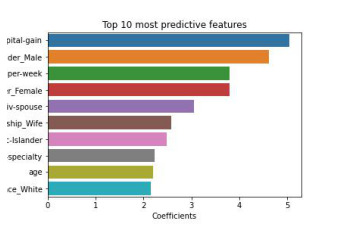

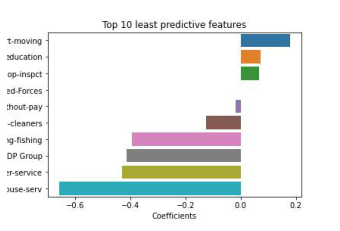

                       SGD Classification Report

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79     24355
         1.0       0.77      0.86      0.81     24355

    accuracy                           0.80     48710
   macro avg       0.81      0.80      0.80     48710
weighted avg       0.81      0.80      0.80     48710


                        precision score

Scores: [0.77293659 0.71717172 0.76694619 0.87867178 0.76108628 0.76272948
 0.78172969 0.7593985  0.76288301 0.79200308]

Mean of the scores: 0.7755556306651717

Standard deviation of the scores: 0.03902148182704336



                        recall score

Scores: [0.89573071 0.93267652 0.90106732 0.56486043 0.908867   0.90431211
 0.85749487 0.91252567 0.89979466 0.84599589]

Mean of the scores: 0.8623325173728771

Standard deviation of the scores: 0.1020757288798986



                        f1 score

Scores: [0.82981555 0.81084939 0.82861457 0.68765617 0.82843779 0.827508

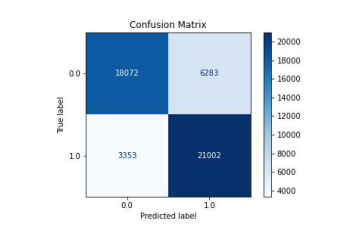

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.893


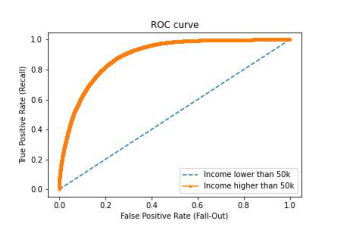


       ***************  Logistic_regression  ***************



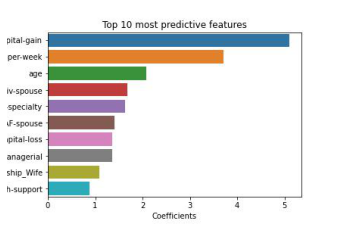

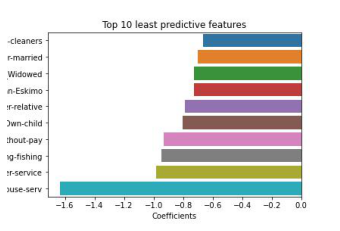

                       Logistic_regression Classification Report

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81     24355
         1.0       0.80      0.84      0.82     24355

    accuracy                           0.81     48710
   macro avg       0.81      0.81      0.81     48710
weighted avg       0.81      0.81      0.81     48710


                        precision score

Scores: [0.8017412  0.78974158 0.80124951 0.80195695 0.79187621 0.79380635
 0.79248238 0.7981904  0.79457364 0.78947368]

Mean of the scores: 0.7955091904805255

Standard deviation of the scores: 0.004651659062771395



                        recall score

Scores: [0.8316913  0.82799672 0.84236453 0.841133   0.84031199 0.83162218
 0.8312115  0.83326489 0.84188912 0.85010267]

Mean of the scores: 0.8371587886021787

Standard deviation of the scores: 0.006616499906219255



                        f1 score

Scores: [0.81644167 0.80841683 0.82129278 0.82107794 

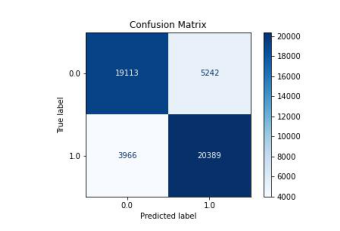

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.893


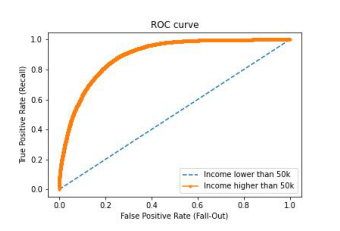


       ***************  Support_vector_machine  ***************

                       Support_vector_machine Classification Report

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79     24355
         1.0       0.78      0.84      0.81     24355

    accuracy                           0.80     48710
   macro avg       0.80      0.80      0.80     48710
weighted avg       0.80      0.80      0.80     48710


                        precision score

Scores: [0.78557729 0.77589526 0.77294867 0.78454511 0.77997716 0.7743295
 0.77726751 0.78106964 0.77883881 0.77304702]

Mean of the scores: 0.7783495974903237

Standard deviation of the scores: 0.004260915904273536



                        recall score

Scores: [0.8407225  0.8271757  0.84688013 0.84605911 0.841133   0.82997947
 0.83408624 0.83367556 0.83737166 0.85749487]

Mean of the scores: 0.8394578246224498

Standard deviation of the scores: 0.008577520424725805



                   

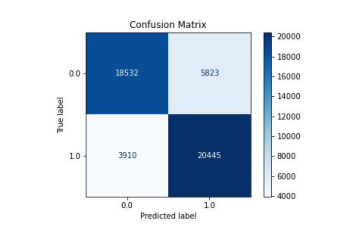

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.888


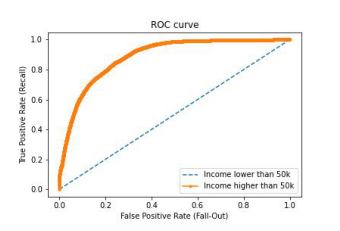


       ***************  Decision_tree  ***************



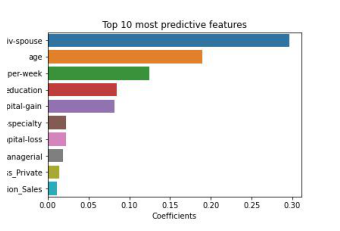

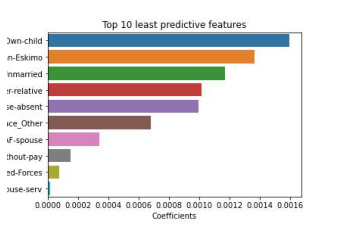

                       Decision_tree Classification Report

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     24355
         1.0       0.85      0.84      0.85     24355

    accuracy                           0.85     48710
   macro avg       0.85      0.85      0.85     48710
weighted avg       0.85      0.85      0.85     48710


                        precision score

Scores: [0.85       0.83900929 0.83704453 0.85761453 0.8623298  0.8451514
 0.85818882 0.86607143 0.86192308 0.86140147]

Mean of the scores: 0.8538734353430595

Standard deviation of the scores: 0.009846927492459533



                        recall score

Scores: [0.68390805 0.66748768 0.67898194 0.85303777 0.93596059 0.90554415
 0.91457906 0.91622177 0.92032854 0.9137577 ]

Mean of the scores: 0.8389807237771553

Standard deviation of the scores: 0.10815763683815853



                        f1 score

Scores: [0.75796178 0.74348422 0.74977335 0.85532002 0.897637

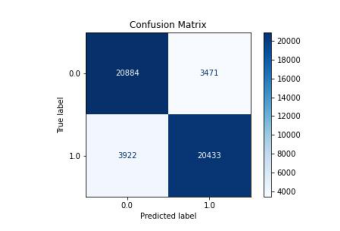

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.999


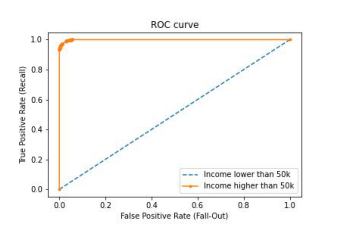


       ***************  Random_forest  ***************



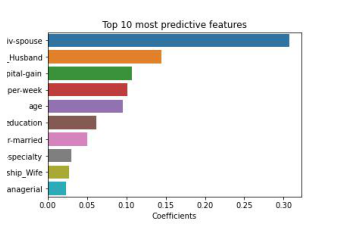

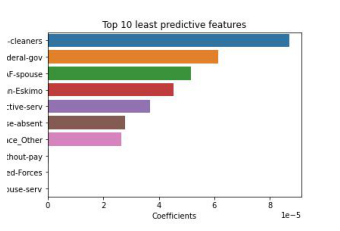

                       Random_forest Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     24355
         1.0       0.78      0.91      0.84     24355

    accuracy                           0.83     48710
   macro avg       0.84      0.83      0.83     48710
weighted avg       0.84      0.83      0.83     48710


                        precision score

Scores: [0.7853461  0.77720398 0.77970386 0.78558813 0.78519036 0.77661431
 0.78773092 0.79137447 0.79143258 0.77766393]

Mean of the scores: 0.7837848656437945

Standard deviation of the scores: 0.005368155520012824



                        recall score

Scores: [0.87561576 0.86494253 0.886289   0.91297209 0.9228243  0.9137577
 0.92813142 0.92689938 0.92566735 0.93511294]

Mean of the scores: 0.9092212466661946

Standard deviation of the scores: 0.023337689926362273



                        f1 score

Scores: [0.82802795 0.81872936 0.82958694 0.84450351 0.84846

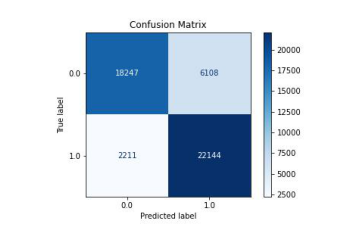

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.920


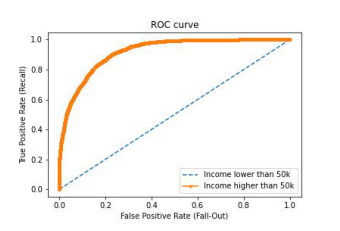


       ***************  Gaussian_naive_bayes  ***************



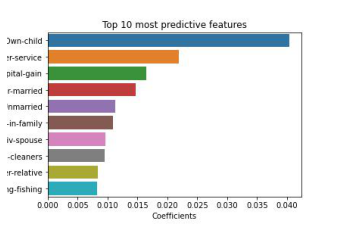

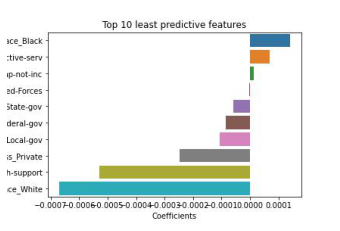

                       Gaussian_naive_bayes Classification Report

              precision    recall  f1-score   support

         0.0       0.87      0.66      0.75     24355
         1.0       0.73      0.90      0.80     24355

    accuracy                           0.78     48710
   macro avg       0.80      0.78      0.78     48710
weighted avg       0.80      0.78      0.78     48710


                        precision score

Scores: [0.72600927 0.72544418 0.72055427 0.73025435 0.72099901 0.72733311
 0.7239894  0.72668701 0.73043767 0.72697368]

Mean of the scores: 0.7258681957893447

Standard deviation of the scores: 0.0031596398301239124



                        recall score

Scores: [0.90065681 0.88834154 0.89655172 0.89573071 0.90065681 0.89938398
 0.8973306  0.88008214 0.90472279 0.90759754]

Mean of the scores: 0.8971054645748409

Standard deviation of the scores: 0.0075323992601607674



                        f1 score

Scores: [0.80395749 0.79867134 0.79897567 0.804572

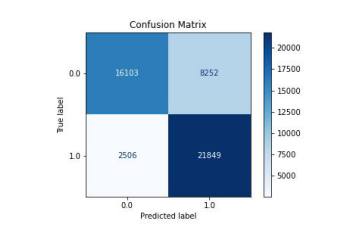

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.865


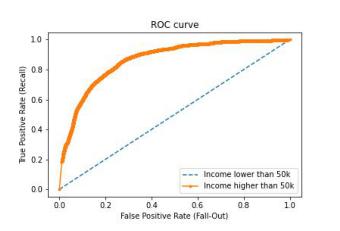


       ***************  K-Nearest_neighbors  ***************

                       K-Nearest_neighbors Classification Report

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83     24355
         1.0       0.81      0.89      0.85     24355

    accuracy                           0.84     48710
   macro avg       0.85      0.84      0.84     48710
weighted avg       0.85      0.84      0.84     48710


                        precision score

Scores: [0.80837859 0.80660194 0.81588167 0.81002244 0.81172161 0.79878701
 0.80468178 0.82259259 0.80811007 0.80611511]

Mean of the scores: 0.809289281035513

Standard deviation of the scores: 0.006147642674653737



                        recall score

Scores: [0.85550082 0.85262726 0.86042693 0.88916256 0.90968801 0.91950719
 0.90349076 0.91211499 0.91663244 0.92032854]

Mean of the scores: 0.8939479504894077

Standard deviation of the scores: 0.02620074943360306



                        f1

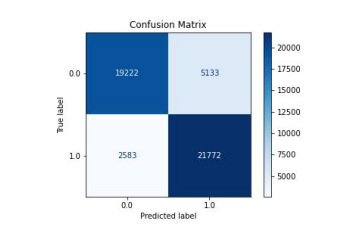

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.964


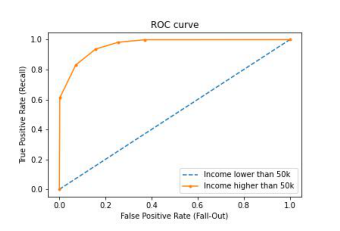


       ***************  Gradient_boosting  ***************



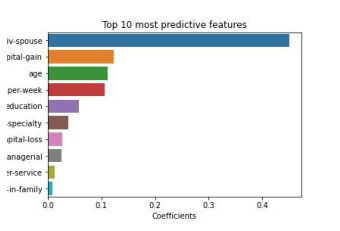

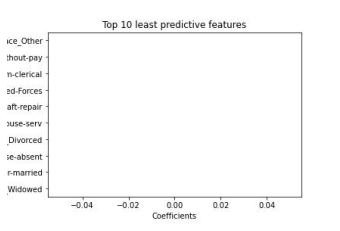

                       Gradient_boosting Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85     24355
         1.0       0.83      0.90      0.86     24355

    accuracy                           0.86     48710
   macro avg       0.86      0.86      0.86     48710
weighted avg       0.86      0.86      0.86     48710


                        precision score

Scores: [0.83354193 0.81529699 0.8254354  0.82915718 0.83253939 0.82415177
 0.83461963 0.83832778 0.83685577 0.83309144]

Mean of the scores: 0.8303017263935084

Standard deviation of the scores: 0.006612571779948256



                        recall score

Scores: [0.82019704 0.8226601  0.83661741 0.89655172 0.93267652 0.92772074
 0.93264887 0.93059548 0.92689938 0.94291581]

Mean of the scores: 0.8969483078935745

Standard deviation of the scores: 0.04763366247012269



                        f1 score

Scores: [0.82681564 0.81896199 0.83098879 0.86153846 0.8

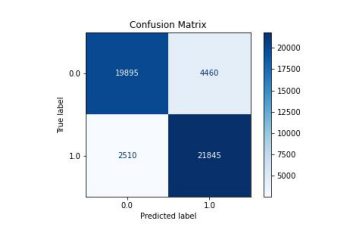

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.941


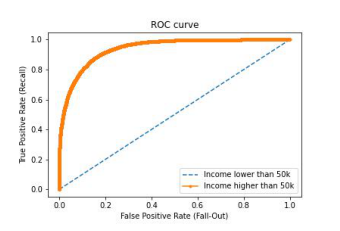


       ***************  Linear_discriminant_analysis  ***************



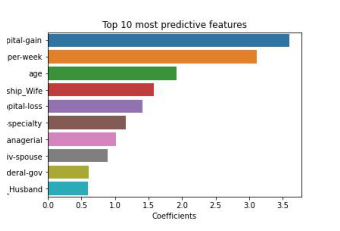

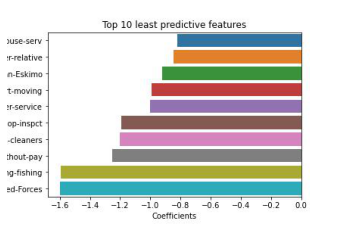

                       Linear_discriminant_analysis Classification Report

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80     24355
         1.0       0.78      0.85      0.81     24355

    accuracy                           0.80     48710
   macro avg       0.81      0.80      0.80     48710
weighted avg       0.81      0.80      0.80     48710


                        precision score

Scores: [0.78552279 0.77646611 0.78741048 0.78479576 0.78190691 0.77837014
 0.77570449 0.78217822 0.78078078 0.77662338]

Mean of the scores: 0.7809759059416234

Standard deviation of the scores: 0.0039099889899369454



                        recall score

Scores: [0.84195402 0.83702791 0.85755337 0.85180624 0.85509031 0.83942505
 0.83655031 0.84353183 0.85420945 0.85954825]

Mean of the scores: 0.8476696742564476

Standard deviation of the scores: 0.008416562783895857



                        f1 score

Scores: [0.81276006 0.80561043 0.82098644 0

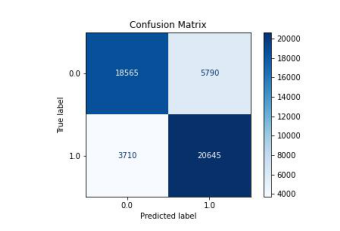

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.889


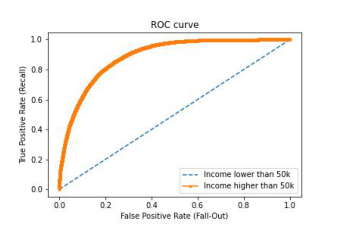


       ***************  Bagging  ***************



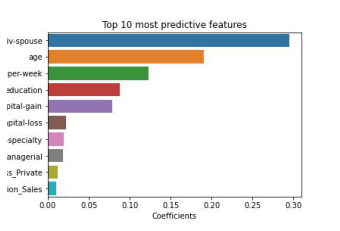

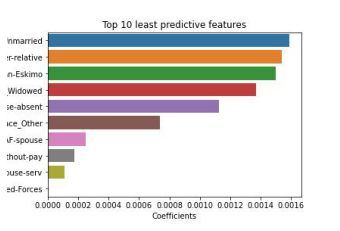

                       Bagging Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     24355
         1.0       0.88      0.86      0.87     24355

    accuracy                           0.87     48710
   macro avg       0.87      0.87      0.87     48710
weighted avg       0.87      0.87      0.87     48710


                        precision score

Scores: [0.87336473 0.85942327 0.85894207 0.88398018 0.87984791 0.87089381
 0.88305215 0.88746605 0.88417431 0.89000386]

Mean of the scores: 0.8771148337925846

Standard deviation of the scores: 0.010530766085909948



                        recall score

Scores: [0.68513957 0.68513957 0.6999179  0.87889984 0.9499179  0.93634497
 0.94579055 0.93921971 0.94989733 0.94702259]

Mean of the scores: 0.8617289932329231

Standard deviation of the scores: 0.11415338466639222



                        f1 score

Scores: [0.7678859  0.76244861 0.77131871 0.88143269 0.91354126 0.

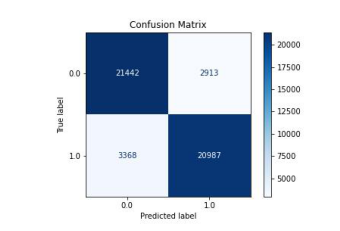

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.997


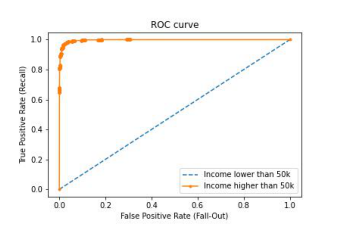


       ***************  Neural_network  ***************

                       Neural_network Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84     24355
         1.0       0.82      0.90      0.86     24355

    accuracy                           0.85     48710
   macro avg       0.85      0.85      0.85     48710
weighted avg       0.85      0.85      0.85     48710


                        precision score

Scores: [0.82311516 0.79018359 0.83143219 0.82537879 0.85283474 0.80678206
 0.808839   0.83508246 0.81947913 0.78250901]

Mean of the scores: 0.8175636127573244

Standard deviation of the scores: 0.020024279254790008



                        recall score

Scores: [0.81568144 0.86576355 0.80788177 0.89449918 0.87068966 0.93798768
 0.94702259 0.91498973 0.94332649 0.98110883]

Mean of the scores: 0.8978950917618338

Standard deviation of the scores: 0.054724104883165564



                        f1 score



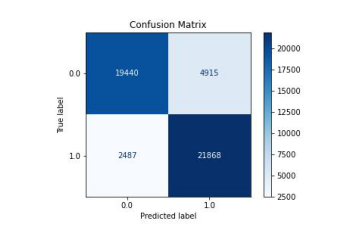

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.947


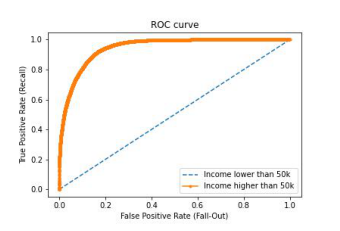


       ***************  AdaBoost  ***************



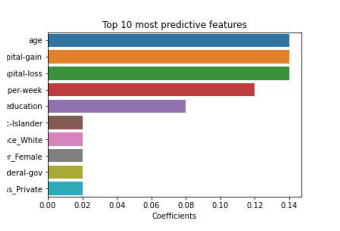

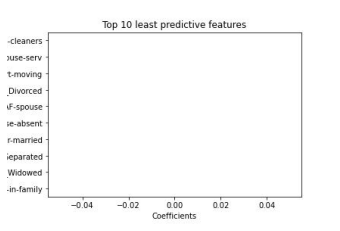

                       AdaBoost Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     24355
         1.0       0.83      0.87      0.85     24355

    accuracy                           0.84     48710
   macro avg       0.85      0.84      0.84     48710
weighted avg       0.85      0.84      0.84     48710


                        precision score

Scores: [0.82581189 0.81544885 0.8239466  0.83260611 0.82690854 0.82424242
 0.84074217 0.84603361 0.83587786 0.83333333]

Mean of the scores: 0.8304951394737436

Standard deviation of the scores: 0.008550426693125727



                        recall score

Scores: [0.80377668 0.80172414 0.81075534 0.86165846 0.89819376 0.8936345
 0.89322382 0.88911704 0.89938398 0.90349076]

Mean of the scores: 0.8654958477053641

Standard deviation of the scores: 0.04082535096646606



                        f1 score

Scores: [0.81464531 0.80852826 0.81729774 0.8468832  0.86107832 0.

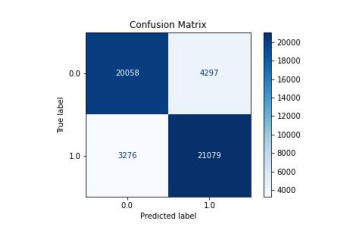

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.928


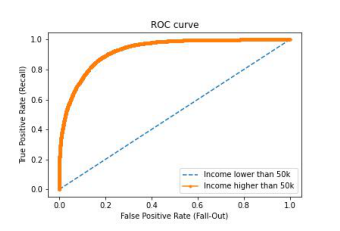


       ***************  Extra_trees  ***************



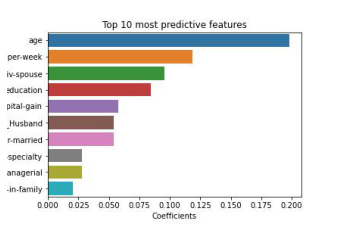

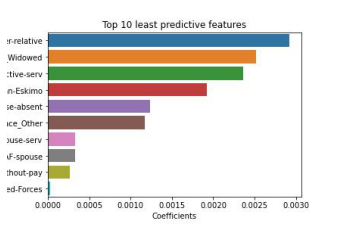

                       Extra_trees Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     24355
         1.0       0.87      0.89      0.88     24355

    accuracy                           0.88     48710
   macro avg       0.88      0.88      0.88     48710
weighted avg       0.88      0.88      0.88     48710


                        precision score

Scores: [0.86946494 0.86832413 0.86857936 0.88014383 0.87758945 0.86263531
 0.87608943 0.8847032  0.87537651 0.88286581]

Mean of the scores: 0.8745771961852187

Standard deviation of the scores: 0.006767883091768545



                        recall score

Scores: [0.77380952 0.77422003 0.77052545 0.9043514  0.95648604 0.94907598
 0.94948665 0.95482546 0.95482546 0.95646817]

Mean of the scores: 0.8944074171479823

Standard deviation of the scores: 0.08090910344437814



                        f1 score

Scores: [0.81885317 0.81857639 0.81661953 0.89208342 0.9153408

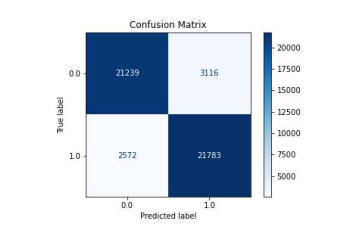

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.999


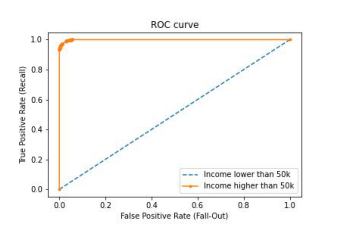

In [196]:
def model_evaluation_df(model_dict, X_train_copy_prep, y_train_copy_prep):
    for model_name,model in model_dict.items():
        evaluate_model(model,model_name,X_train_copy_prep,y_train_copy_prep)
model_evaluation_df(model_dict,X_train_copy_prep, y_train_copy_prep)

In [197]:
create_summary_table(summary_data)


       ***************  Metrics Summary Table  ***************



## 5.3. Analyze the most significant variables for each algorithm.
### (For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds)

Done in quick models comparison

## 5.4 Analyze the types of errors the models make.

The most important metrics here is ***precision***. To explain this, let's say that we want to use this to predict the income of applicant who want to apply for a mortgage. We would care more rejecting some good applicants(Low variance) but keeping a few applicants which are 100% sure that they won't default on their mortgage(High precision).


## 5.5 Perform a quick round of feature selection and/or engineering.

Dropping drop the 10 least predictive features for Random forest, Gradiant boosting and Bagging retrain the model

In [219]:
#changing the summary data to a numpy array for easier manipulation
np_summary_data = np.array(summary_data)

In [220]:
pd.set_option('max_colwidth', 2000)
model_ft_to_drop_df_all = pd.DataFrame(np_summary_data[:,[0,11]], columns=['Model name','Least predictive feat'])

In [221]:
# extract the most promising model: Random forest, Bagging, Gradient boosting, KNN, and Neural network.
model_ft_to_drop_df = model_ft_to_drop_df_all.iloc[[4,6,7,9,10]]
# regular expression to extract the feature names
patterns = ':\s*([^:.<]+)<'

In [222]:
# extract the feature names as a list from the model_ft_to_drop_df
def extract_ft_names(model_ft_to_drop_df):
    for _, row in model_ft_to_drop_df.iterrows():
        if row['Least predictive feat'] != 'No coeficient or feature importance for this model':
            row['Least predictive feat'] = re.findall(patterns,row['Least predictive feat'])
extract_ft_names(model_ft_to_drop_df)

In [223]:
#Implement a feature selection function that takes in the least predictive features for each model, drop them and retrain the models automatically.
def drop_least_useful_ft(model_name,feat_list):
    X_train_copy_prep_drop_ft = X_train_copy_prep.drop(feat_list,axis=1)
    X_train_copy_prep_drop_ft_path = Path('saved_preliminary_models/{0}/X_train_copy_prep_drop_ft_{0}.sav'.format(model_name))
    try:
        #check if the path exists
        X_train_copy_prep_drop_ft_path.resolve(strict=True)
    except FileNotFoundError:
        joblib.dump(X_train_copy_prep_drop_ft,X_train_copy_prep_drop_ft_path)
    model_dict_drop_ft = {model_name:model_dict[model_name]}
    # retrain each models with the least predictive features dropped
    model_evaluation_df(model_dict_drop_ft, X_train_copy_prep_drop_ft, y_train_copy_prep)



       ***************  Random_forest  ***************



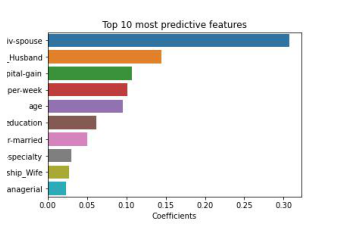

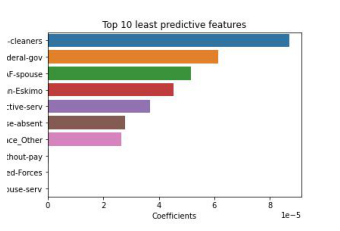

                       Random_forest Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81     24355
         1.0       0.78      0.91      0.84     24355

    accuracy                           0.83     48710
   macro avg       0.84      0.83      0.83     48710
weighted avg       0.84      0.83      0.83     48710


                        precision score

Scores: [0.7853461  0.77720398 0.77970386 0.78558813 0.78519036 0.77661431
 0.78773092 0.79137447 0.79143258 0.77766393]

Mean of the scores: 0.7837848656437945

Standard deviation of the scores: 0.005368155520012824



                        recall score

Scores: [0.87561576 0.86494253 0.886289   0.91297209 0.9228243  0.9137577
 0.92813142 0.92689938 0.92566735 0.93511294]

Mean of the scores: 0.9092212466661946

Standard deviation of the scores: 0.023337689926362273



                        f1 score

Scores: [0.82802795 0.81872936 0.82958694 0.84450351 0.84846

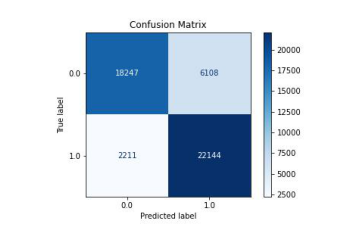

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.920


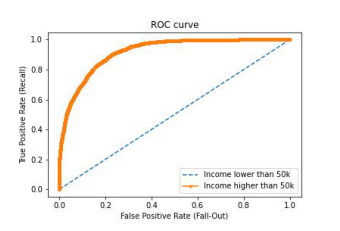


       ***************  Gradient_boosting  ***************



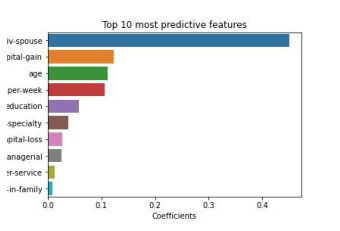

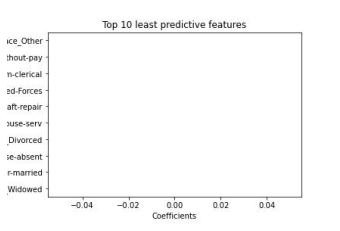

                       Gradient_boosting Classification Report

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85     24355
         1.0       0.83      0.90      0.86     24355

    accuracy                           0.86     48710
   macro avg       0.86      0.86      0.86     48710
weighted avg       0.86      0.86      0.86     48710


                        precision score

Scores: [0.83354193 0.81529699 0.8254354  0.82915718 0.83253939 0.82415177
 0.83461963 0.83832778 0.83685577 0.83309144]

Mean of the scores: 0.8303017263935084

Standard deviation of the scores: 0.006612571779948256



                        recall score

Scores: [0.82019704 0.8226601  0.83661741 0.89655172 0.93267652 0.92772074
 0.93264887 0.93059548 0.92689938 0.94291581]

Mean of the scores: 0.8969483078935745

Standard deviation of the scores: 0.04763366247012269



                        f1 score

Scores: [0.82681564 0.81896199 0.83098879 0.86153846 0.8

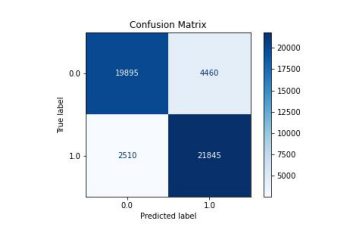

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.941


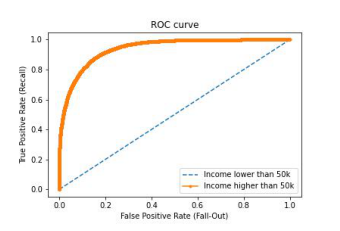


       ***************  Bagging  ***************



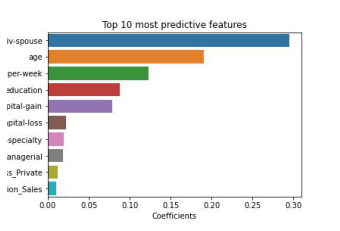

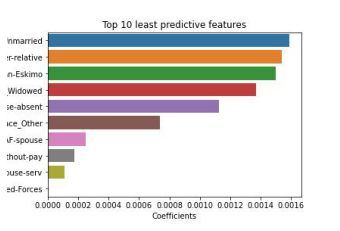

                       Bagging Classification Report

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     24355
         1.0       0.88      0.86      0.87     24355

    accuracy                           0.87     48710
   macro avg       0.87      0.87      0.87     48710
weighted avg       0.87      0.87      0.87     48710


                        precision score

Scores: [0.87336473 0.85942327 0.85894207 0.88398018 0.87984791 0.87089381
 0.88305215 0.88746605 0.88417431 0.89000386]

Mean of the scores: 0.8771148337925846

Standard deviation of the scores: 0.010530766085909948



                        recall score

Scores: [0.68513957 0.68513957 0.6999179  0.87889984 0.9499179  0.93634497
 0.94579055 0.93921971 0.94989733 0.94702259]

Mean of the scores: 0.8617289932329231

Standard deviation of the scores: 0.11415338466639222



                        f1 score

Scores: [0.7678859  0.76244861 0.77131871 0.88143269 0.91354126 0.

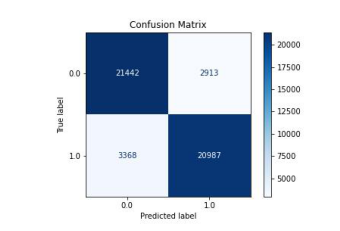

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.997


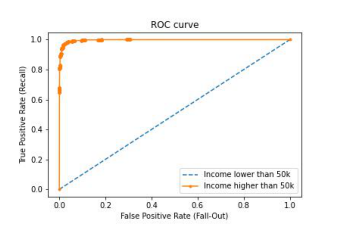

In [224]:
def drop_ft_retrain(model_ft_to_drop_df):
    # drop the least predictive features
    for indexes, row in model_ft_to_drop_df.iterrows():
        if row['Least predictive feat'] != 'No coeficient or feature importance for this model':
            #X_train_copy_prep.drop(row['Least predictive feat'],axis=1,inplace=True)
            #print(row['Model name'],row['Least predictive feat'])
            drop_least_useful_ft(row['Model name'],row['Least predictive feat'])
drop_ft_retrain(model_ft_to_drop_df)

## 5.6. Perform one or two more quick iterations of the five previous steps.

Done!

## 5.7. Shortlist the top three to five most promising models, preferring models that make different types of errors.


We will focus on 5 models: Random forest, Bagging, Gradient boosting, KNN, and Neural network as it yields the best results and use precision as the metric.

# 6. Fine-Tune the System

## 6.1. Fine-tune the hyperparameters using cross-validation

### 6.1.1 Random Forest

In [227]:
param_grid_rand_for = {
    'n_estimators' : [100, 200, 300, 500, 800, 1200, 1500, 1800, 2000],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10],
    'bootstrap' : [True, False]
}
rand_forest_clf = model_dict['Random_forest']
randomize_search_rand_for = RandomizedSearchCV(estimator = rand_forest_clf, param_distributions = param_grid_rand_for, cv=5, n_jobs=-1, verbose=3, scoring='precision')
X_train_copy_prep_drop_ft = joblib.load('saved_preliminary_models/Random_forest/X_train_copy_prep_drop_ft_Random_forest.sav')
randomize_search_rand_for.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=0.818 total time=  37.6s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=0.825 total time=  38.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=0.837 total time=  38.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=0.826 total time=  38.4s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1200;, score=0.823 total time=  38.8s
[CV 3/5] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200;, score=0.857 total time= 1.1mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 500,
                                                         800, 1200, 1500, 1800,
                                                         2000]},
                   scoring='precision', verbose=3)

In [228]:
best_rand_for_clf = randomize_search_rand_for.best_estimator_
best_rand_for_clf.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)
precision_score_rand_for = np.mean(cross_val_score(best_rand_for_clf,X_train_copy_prep_drop_ft,y_train_copy_prep,scoring='precision',cv=10,n_jobs=-1,verbose=3))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.877) total time=  18.3s
[CV] END ................................ score: (test=0.879) total time=  18.3s
[CV] END ................................ score: (test=0.884) total time=  18.5s


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   18.5s remaining:   43.2s


[CV] END ................................ score: (test=0.877) total time=  18.6s
[CV] END ................................ score: (test=0.872) total time=  18.7s
[CV] END ................................ score: (test=0.878) total time=  18.8s
[CV] END ................................ score: (test=0.883) total time=  18.8s


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   18.9s remaining:    8.1s


[CV] END ................................ score: (test=0.874) total time=  19.0s
[CV] END ................................ score: (test=0.891) total time=  11.2s
[CV] END ................................ score: (test=0.873) total time=  11.2s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.7s finished


In [229]:
precision_score_rand_for

0.8787312719483935

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.920


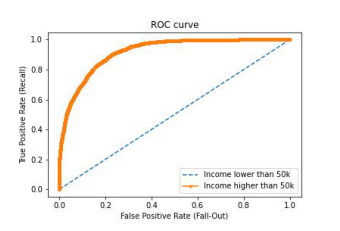

(0.9196586790350982,
 '<img src="saved_preliminary_models/Random_forest/Random_forest_ROC_curve.jpg">')

In [230]:
roc_curve_fuc(best_rand_for_clf, 'Random_forest', X_train_copy_prep_drop_ft, y_train_copy_prep)

In [294]:
randomize_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

### 6.1.2 Neural network

In [271]:
param_grid_nn = {
    'hidden_layer_sizes': [(1,),(50,),(10,30,10),(20,),(50,50,50), (50,100,50), (100,),(500, 400, 300, 200, 100), (400, 400, 400, 400, 400)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.005,0.0005, 0.05],
    'learning_rate': ['constant','adaptive'],
}


In [272]:
Neural_network_clf = model_dict['Neural_network']

In [273]:
randomize_search_nn = RandomizedSearchCV(estimator = Neural_network_clf, param_distributions = param_grid_nn, cv=5, n_jobs=-1, verbose=3, scoring='precision')

In [274]:
randomize_search_nn.fit(X_train_copy_prep, y_train_copy_prep)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END activation=identity, alpha=0.005, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.805 total time=   2.6s
[CV 5/5] END activation=identity, alpha=0.005, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.798 total time=   3.2s
[CV 4/5] END activation=identity, alpha=0.005, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.789 total time=   3.3s
[CV 2/5] END activation=identity, alpha=0.005, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.785 total time=   3.6s
[CV 1/5] END activation=identity, alpha=0.005, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam;, score=0.802 total time=   4.2s
[CV 1/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=lbfgs;, score=0.800 total time=  10.9s
[CV 3/5] END activation=identity, alpha=0.05, hidden_layer_sizes=(10, 30, 10), l

RandomizedSearchCV(cv=5,
                   estimator=MLPClassifier(max_iter=1000, random_state=42),
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.005, 0.0005, 0.05],
                                        'hidden_layer_sizes': [(1,), (50,),
                                                               (10, 30, 10),
                                                               (20,),
                                                               (50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,),
                                                               (500, 400, 300,
                                                                200, 100),
                                           

In [275]:
best_nn_clf = randomize_search_nn.best_estimator_
best_nn_clf.fit(X_train_copy_prep, y_train_copy_prep)
precision_score_nn = np.mean(cross_val_score(best_nn_clf,X_train_copy_prep,y_train_copy_prep,scoring='precision',cv=10,n_jobs=-1,verbose=3))
precision_score_nn

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.805) total time= 1.1min
[CV] END ................................ score: (test=0.810) total time= 1.1min
[CV] END ................................ score: (test=0.825) total time= 1.2min


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.2min remaining:  2.9min


[CV] END ................................ score: (test=0.837) total time= 1.3min
[CV] END ................................ score: (test=0.826) total time= 1.3min
[CV] END ................................ score: (test=0.800) total time= 1.4min
[CV] END ................................ score: (test=0.824) total time= 1.4min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.5min remaining:   37.3s


[CV] END ................................ score: (test=0.794) total time= 1.4min
[CV] END ................................ score: (test=0.823) total time=  45.3s
[CV] END ................................ score: (test=0.834) total time=  51.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.0min finished


0.817835238910804

### 6.1.3 Knn

In [277]:
param_grid_knn = {
    'n_neighbors' : [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
    }

In [278]:
knn_clf = model_dict['K-Nearest_neighbors']
randomize_search_knn = RandomizedSearchCV(estimator = knn_clf, param_distributions = param_grid_knn, cv=5, n_jobs=-1, verbose=3, scoring='precision')
randomize_search_knn.fit(X_train_copy_prep, y_train_copy_prep)
best_knn_clf = randomize_search_knn.best_estimator_
best_knn_clf.fit(X_train_copy_prep, y_train_copy_prep)
precision_score_knn = np.mean(cross_val_score(best_knn_clf,X_train_copy_prep,y_train_copy_prep,scoring='precision',cv=10,n_jobs=-1,verbose=3))
precision_score_knn

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.824 total time= 4.1min
[CV 2/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.818 total time= 4.1min
[CV 5/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.830 total time= 4.1min
[CV 4/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.830 total time= 4.1min
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.824 total time= 4.1min
[CV 3/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.829 total time= 4.1min
[CV 1/5] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.824 total time= 4.1min
[CV 1/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.820 total time= 4.1min
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.824 total time= 1.0min
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.82

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.844) total time= 1.3min
[CV] END ................................ score: (test=0.843) total time= 1.3min
[CV] END ................................ score: (test=0.837) total time= 1.3min
[CV] END ................................ score: (test=0.830) total time= 1.3min
[CV] END ................................ score: (test=0.843) total time= 1.3min
[CV] END ................................ score: (test=0.823) total time= 1.3min
[CV] END ................................ score: (test=0.836) total time= 1.3min
[CV] END ................................ score: (test=0.837) total time= 1.3min


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.3min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.3min remaining:   34.1s


[CV] END ................................ score: (test=0.839) total time=  11.2s
[CV] END ................................ score: (test=0.844) total time=  11.2s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


0.8375594861235637

### 6.1.4 Gradient_boosting

In [279]:
param_grid_gb = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [280]:
gb_clf = model_dict['Gradient_boosting']
randomize_search_gb = RandomizedSearchCV(estimator = gb_clf, param_distributions = param_grid_gb, cv=5, n_jobs=-1, verbose=3, scoring='precision')
X_train_copy_prep_drop_ft = joblib.load('saved_preliminary_models/Gradient_boosting/X_train_copy_prep_drop_ft_Gradient_boosting.sav')
randomize_search_gb.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)
best_gb_clf = randomize_search_gb.best_estimator_
best_gb_clf.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)
precision_score_gb = np.mean(cross_val_score(best_gb_clf,X_train_copy_prep_drop_ft,y_train_copy_prep,scoring='precision',cv=10,n_jobs=-1,verbose=3))
precision_score_gb

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.811 total time=   2.6s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.806 total time=   2.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.815 total time=   2.7s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.809 total time=   2.7s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.806 total time=   2.8s
[CV 2/5] END learning_rate=100, max_depth=5, n_estimators=5;, score=0.498 total time=   0.4s
[CV 3/5] END learning_rate=100, max_depth=5, n_estimators=5;, score=0.430 total time=   0.4s
[CV 1/5] END learning_rate=100, max_depth=5, n_estimators=5;, score=0.302 total time=   0.5s
[CV 4/5] END learning_rate=100, max_depth=5, n_estimators=5;, score=0.505 total time=   0.4s
[CV 5/5] END learning_rate=100, max_depth=5, n_estimators=5;, score=0.496 total time=   0.4s
[CV 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.911) total time= 1.4min
[CV] END ................................ score: (test=0.904) total time= 1.4min
[CV] END ................................ score: (test=0.906) total time= 1.4min


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.4min remaining:  3.3min


[CV] END ................................ score: (test=0.898) total time= 1.4min
[CV] END ................................ score: (test=0.906) total time= 1.4min
[CV] END ................................ score: (test=0.900) total time= 1.4min
[CV] END ................................ score: (test=0.900) total time= 1.4min


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.4min remaining:   36.8s


[CV] END ................................ score: (test=0.888) total time= 1.4min
[CV] END ................................ score: (test=0.901) total time=  51.4s
[CV] END ................................ score: (test=0.912) total time=  51.3s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


0.902628326566183

### 6.1.5 Bagging

In [283]:
param_grid_bag = {
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'n_estimators': [5, 10, 15],
    'max_samples' : [0.6, 0.8, 1.0],
    'max_features' : [0.6, 0.8, 1.0]
}

In [284]:
bag_clf = model_dict['Bagging']
randomize_search_bag = RandomizedSearchCV(estimator = bag_clf, param_distributions = param_grid_bag, cv=5, n_jobs=-1, verbose=3, scoring='precision')
X_train_copy_prep_drop_ft = joblib.load('saved_preliminary_models/Bagging/X_train_copy_prep_drop_ft_Bagging.sav')
randomize_search_bag.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)
best_bag_clf = randomize_search_bag.best_estimator_
best_bag_clf.fit(X_train_copy_prep_drop_ft, y_train_copy_prep)
precision_score_bag = np.mean(cross_val_score(best_bag_clf,X_train_copy_prep_drop_ft,y_train_copy_prep,scoring='precision',cv=10,n_jobs=-1,verbose=3))
precision_score_bag

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.857 total time=   1.1s
[CV 3/5] END bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.858 total time=   1.1s
[CV 1/5] END bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.857 total time=   1.2s
[CV 3/5] END bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.850 total time=   1.6s
[CV 4/5] END bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.852 total time=   1.7s
[CV 5/5] END bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, score=0.860 total time=   1.7s
[CV 1/5] END bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=5;, 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ................................ score: (test=0.871) total time=   2.2s
[CV] END ................................ score: (test=0.880) total time=   2.3s
[CV] END ................................ score: (test=0.876) total time=   2.4s
[CV] END ................................ score: (test=0.862) total time=   2.5s
[CV] END ................................ score: (test=0.881) total time=   2.4s
[CV] END ................................ score: (test=0.884) total time=   2.5s
[CV] END ................................ score: (test=0.880) total time=   2.5s
[CV] END ................................ score: (test=0.880) total time=   2.6s


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.5s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.6s remaining:    1.1s


[CV] END ................................ score: (test=0.882) total time=   1.2s
[CV] END ................................ score: (test=0.882) total time=   1.1s


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


0.8777322951435707


                ROC curve

Income lower than 50k: ROC AUC=0.500
Income higher than 50k: ROC AUC=0.833


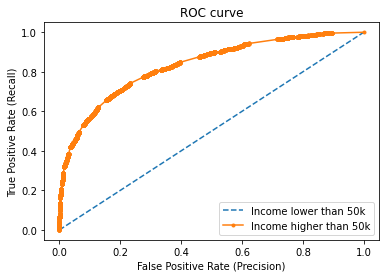

(0.8334865911184245,
 '<img src="saved_preliminary_models/Bagging/Bagging_ROC_curve.jpg">')

In [293]:
roc_curve_fuc(best_bag_clf, 'Bagging', X_train_copy_prep_drop_ft, y_train_copy_prep)

## 6.2 Winner

We will use the random forest with the best parameters and use the precision as metrics

In [297]:
# best_parameter_rand_forest = {
#     'n_estimators': 500,
#     'min_samples_split': 10,
#     'min_samples_leaf': 1,
#     'max_features': 'sqrt',
#     'max_depth': 25,
#     'bootstrap': False}

## 6.3 Try Ensemble methods. Combining your best models will often produce better performance than running them individually.

Done!

### 6.4 Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

In [235]:
X_test_copy_prep

In [236]:
X_train_copy_prep_drop_ft

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0         11.000      0.000 0.691         0.339         0.000           0.398   
1         15.000      0.000 0.480         0.000         0.000           0.378   
2         11.000      0.000 0.238         0.000         0.000           0.296   
3         11.000      0.000 0.260         0.000         0.764           0.398   
4         15.000      1.000 0.166         0.000         0.000           0.398   
...          ...        ...   ...           ...           ...             ...   
48859     14.000      0.000 0.799         0.000         0.844           0.287   
48860     15.000      0.000 0.614         0.000         0.775           0.500   
48861      7.000      0.000 0.642         0.000         0.000           0.420   
48862     15.000      0.000 0.496         0.000         0.000           0.398   
48863     11.000      0.000 0.523         0.000         0.000           0.398   

       race_Asian-Pac-Islander  race_Black  race_White  gender_Female  \
0                        0.000       0.000       1.000          1.000   
1                        0.000       0.000       1.000          1.000   
2                        0.000       0.000       1.000          1.000   
3                        0.000       0.000       1.000          0.000   
4                        1.000       0.000       0.000          0.000   
...                        ...         ...         ...            ...   
48859                    0.000       0.000       1.000          0.000   
48860                    0.000       0.000       1.000          0.000   
48861                    0.000       0.000       1.000          0.000   
48862                    0.000       0.000       1.000          1.000   
48863                    0.000       0.000       1.000          0.000   

       gender_Male  workclass_Local-gov  workclass_Private  \
0            0.000                0.000              0.000   
1            0.000                1.000              0.000   
2            0.000                0.000              0.000   
3            1.000                0.000              0.000   
4            1.000                0.000              1.000   
...            ...                  ...                ...   
48859        1.000                0.000              0.000   
48860        1.000                0.000              1.000   
48861        1.000                0.000              1.000   
48862        0.000                0.000              1.000   
48863        1.000                0.000              1.000   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                       0.000                       0.000   
1                       0.000                       0.000   
2                       0.000                       0.000   
3                       1.000                       0.000   
4                       0.000                       0.000   
...                       ...                         ...   
48859                   0.000                       1.000   
48860                   0.000                       0.000   
48861                   0.000                       0.000   
48862                   0.000                       0.000   
48863                   0.000                       0.000   

       workclass_State-gov  occupation_Adm-clerical  occupation_Craft-repair  \
0                    1.000                    1.000                    0.000   
1                    0.000                    1.000                    0.000   
2                    1.000                    1.000                    0.000   
3                    0.000                    0.000                    1.000   
4                    0.000                    0.000                    0.000   
...                    ...                      ...                      ...   
48859                0.000                    0.000                    0.000   
48860                0.000             

In [242]:
# get the row that are not present in another dataframe
col_dropped = []
for col in X_test_copy_prep.columns:
    if col not in X_train_copy_prep_drop_ft.columns:
        col_dropped.append(col)

In [243]:
col_dropped

['race_Amer-Indian-Eskimo',
 'race_Other',
 'workclass_Federal-gov',
 'workclass_Without-pay',
 'occupation_Armed-Forces',
 'occupation_Handlers-cleaners',
 'occupation_Priv-house-serv',
 'occupation_Protective-serv',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-spouse-absent']

In [251]:
X_test_copy_prep_drop_ft = X_test_copy_prep.drop(col_dropped, axis=1)

In [252]:
X_test_copy_prep_drop_ft

education  GDP Group   age  capital-gain  capital-loss  hours-per-week  \
0         11.000      0.000 0.570         0.000         0.000           0.480   
1          9.000      0.000 0.210         0.000         0.000           0.500   
2          8.000      0.000 0.434         0.000         0.000           0.398   
3          9.000      0.000 0.676         0.000         0.000           0.500   
4          0.000      0.000 0.785         0.000         0.000           0.398   
...          ...        ...   ...           ...           ...             ...   
12017      9.000      0.755 0.451         0.000         0.000           0.454   
12018     10.000      0.000 0.326         0.339         0.000           0.732   
12019     15.000      0.000 0.678         0.000         0.000           0.398   
12020     15.000      0.000 0.641         0.000         0.000           0.317   
12021     15.000      0.000 0.379         0.000         0.000           0.503   

       race_Asian-Pac-Islander  race_Black  race_White  gender_Female  \
0                        0.000       0.000       1.000          0.000   
1                        0.000       0.000       1.000          0.000   
2                        0.000       0.000       1.000          0.000   
3                        0.000       0.000       1.000          0.000   
4                        0.000       1.000       0.000          1.000   
...                        ...         ...         ...            ...   
12017                    1.000       0.000       0.000          0.000   
12018                    0.000       0.000       1.000          0.000   
12019                    0.000       0.000       0.480          1.000   
12020                    0.000       0.000       1.000          1.000   
12021                    0.000       0.000       1.000          0.000   

       gender_Male  workclass_Local-gov  workclass_Private  \
0            1.000                0.000              1.000   
1            1.000                0.000              1.000   
2            1.000                0.000              1.000   
3            1.000                0.000              0.000   
4            0.000                0.000              1.000   
...            ...                  ...                ...   
12017        1.000                0.000              1.000   
12018        1.000                0.000              1.000   
12019        0.000                0.000              0.000   
12020        0.000                0.000              1.000   
12021        1.000                0.000              1.000   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                       0.000                       0.000   
1                       0.000                       0.000   
2                       0.000                       0.000   
3                       1.000                       0.000   
4                       0.000                       0.000   
...                       ...                         ...   
12017                   0.000                       0.000   
12018                   0.000                       0.000   
12019                   0.000                       0.000   
12020                   0.000                       0.000   
12021                   0.000                       0.000   

       workclass_State-gov  occupation_Adm-clerical  occupation_Craft-repair  \
0                    0.000                    1.000                    0.000   
1                    0.000                    0.000                    0.000   
2                    0.000                    0.000                    0.000   
3                    0.000                    0.000                    1.000   
4                    0.000                    1.000                    0.000   
...                    ...                      ...                      ...   
12017                0.000                    0.000                    0.000   
12018                0.000             

In [253]:
final_predictions = best_rand_for_clf.predict(X_test_copy_prep_drop_ft)

In [254]:
final_predictions

array([0., 0., 0., ..., 1., 1., 1.])

In [255]:
final_predictions.shape

(12022,)

In [256]:
y_test_copy_prep.shape

(12022,)

In [257]:
n_correct = sum(final_predictions == y_test_copy_prep)

In [258]:
print(n_correct/len(final_predictions))

0.8428714024288804
